<a href="https://colab.research.google.com/github/sahar-felehgari/A-deep-learning-approach-for-automatic-segmentation-of-acute-ischemic-stroke-lesion/blob/main/deep_learning_approach_for_diagnosing_Stroke_Type_and_Severity_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.preprocessing**

In [ ]:
! pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.6 MB/s eta 0:00:00


In [ ]:
! pip install normalization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalization: filename=normalization-0.4-py3-none-any.whl size=43996 sha256=6f2fb1b9c462b521ad460e38fae4805edaa2cbead5e69f96f01428e16d5acc2a
  Stored in directory: /root/.cache/pip/wheels/ff/18/30/a64cda03dd70fece2924da118b1667c25421c30832e1530f3f
Successfully built normalization


In [ ]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
from keras import regularizers
from tensorflow.keras import initializers
#from keras.layers.normalization import BatchNormalization
from keras.applications import ResNet152V2
import os
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import tensorflow as tf
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf
from keras.optimizers import SGD, Adam
#from keras.utils.np_utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, TimeDistributed,Lambda, MaxPooling2D,AveragePooling2D, GRU# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation,Reshape,Bidirectional # core layers1
#from keras.layers.normalization import BatchNormalization
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
import tensorflow as tf
import os
import cv2
import random
import numpy as np
import pandas as pd
import pydicom
import keras
import matplotlib.pyplot as plt
from skimage import transform
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from scipy import ndimage
from skimage import io, exposure, img_as_float
from sklearn import svm
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image


In [ ]:
!pip install rarfile
!pip install patool

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Set the path to your .dcm  image folder
img_dir = "/content/drive/MyDrive/Stroke Detection/Tracew+Adc+Normal/unzip-Tracew+Adc+Normal/Tracew+Adc+Normal"
csv_path = "/content/drive/MyDrive/Stroke Detection/Tracew+Adc+Normal/tracew+adc+normal(ischem+hemorr+normal).csv"

In [ ]:
# Set the target image size
imge_size = (224, 224)

In [ ]:
# Load the DWIlabels from the CSV file into a pandas DataFrame
labels_df = pd.read_csv(csv_path)

In [ ]:
labels_df

In [ ]:
# Show pixel image size
dcmHandler = pydicom.dcmread("/content/drive/MyDrive/Stroke Detection/Tracew+Adc+Normal/unzip-Tracew+Adc+Normal/Tracew+Adc+Normal/ADC-ischemic (127).dcm")
print("Pixel Image Size: ", dcmHandler.pixel_array.shape)

Pixel Image Size:  (260, 260)


In [ ]:
dcm_ext = '.dcm'

In [ ]:
#function for Load the images and preprocessing them
def load_images(filename):
    # Load the ADC image
    img_file = os.path.join(img_dir, filename + dcm_ext)
    img_dcm = pydicom.dcmread(img_file)
    image = img_dcm.pixel_array
    image = cv2.resize(image, (224, 224))

  #    #PREPROCCESING
  #    # Normalize the DWI data using exposure equalization
    img_data = exposure.equalize_hist(image)

  #  # Rescale the image data between 0 and 1
    img_data = img_as_float(img_data)


    image = np.dstack([img_data, img_data,img_data])
    image =  cv2.normalize(src=image, dst=image, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    # # display grayscale image
    # plt.imshow(image, cmap='gray')
    # plt.axis('off')
    # plt.show()
    return image

In [ ]:
# Load the images and labels into numpy arrays
X = []
y = []
for filename, img_label in zip(labels_df['ID'], labels_df['label']):
    image = load_images(filename)
    if image is not None:
        X.append(image)
        if img_label == 'normal':
            y.append(0)
        elif img_label == 'ischemic':
             y.append(1)
        elif img_label == 'hemorrhagic':
             y.append(2)

# Convert the lists to numpy arrays
X = np.stack(X)
y = np.array(y)


In [ ]:
len_x= len(X)
len_y= len(X)
print("len_y:",len_y,"len_x:",len_x)

len_y: 1576 len_x: 1576


In [ ]:
print(X[1].shape)

(224, 224, 3)


In [ ]:
y= to_categorical(y,num_classes=3)
#print(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(1134, 3)
(158, 3)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(1134, 224, 224, 3)
(158, 224, 224, 3)


In [ ]:
print(X_val.shape)
print(y_val.shape)


(284, 224, 224, 3)
(284, 3)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.2),

    ]
)

In [ ]:
# Create an image data generator object to apply data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=data_augmentation,
    validation_split=0.2
)

# Create the training data generator
train_generator = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
    shuffle=True,
    subset='training'
)

# Create the validation data generator
val_generator = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
    shuffle=True,
    subset='validation'
)
# Cross-validation function
def cross_validate(X, y, n_splits=10, epochs=150, batch_size=32, callbacks=None):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_no = 1

    for train_index, val_index in kfold.split(X):
        print(f'Fold {fold_no}:')

# **NON- combine- stroke detection**

**ResNet-single modal**







In [ ]:
# Create the ResNet model
base_model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)

# Freeze the base model
base_model.trainable = False

# Add the classification head
inputs = keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_resnet = keras.Model(inputs, outputs)

# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_resnet.fit(x=X_train,y=y_train,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    epochs=150, verbose=1,callbacks=callbacks)

Epoch 1/150
36/36 [==============================] - 16s 269ms/step - loss: 0.8655 - accuracy: 0.6631 - val_loss: 0.7675 - val_accuracy: 0.6972
Epoch 2/150
36/36 [==============================] - 5s 147ms/step - loss: 0.6847 - accuracy: 0.7072 - val_loss: 0.6808 - val_accuracy: 0.7042
Epoch 3/150
36/36 [==============================] - 5s 147ms/step - loss: 0.6349 - accuracy: 0.7381 - val_loss: 0.7763 - val_accuracy: 0.6549
Epoch 4/150
36/36 [==============================] - 5s 140ms/step - loss: 0.6383 - accuracy: 0.7310 - val_loss: 0.6362 - val_accuracy: 0.7465
Epoch 5/150
36/36 [==============================] - 5s 139ms/step - loss: 0.5959 - accuracy: 0.7593 - val_loss: 0.6397 - val_accuracy: 0.7254
Epoch 6/150
36/36 [==============================] - 5s 147ms/step - loss: 0.5465 - accuracy: 0.7690 - val_loss: 0.6265 - val_accuracy: 0.7324
Epoch 7/150
36/36 [==============================] - 5s 150ms/step - loss: 0.5142 - accuracy: 0.7822 - val_loss: 0.5786 - val_accuracy: 0.760

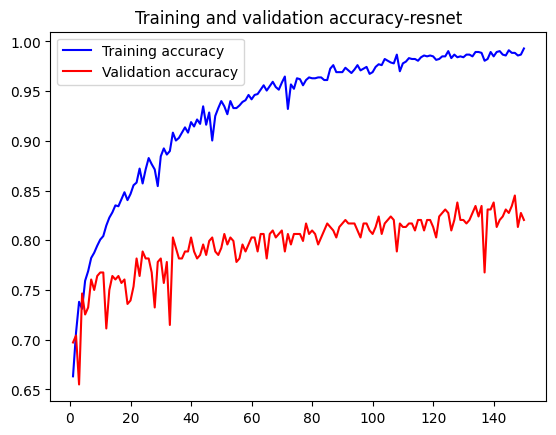

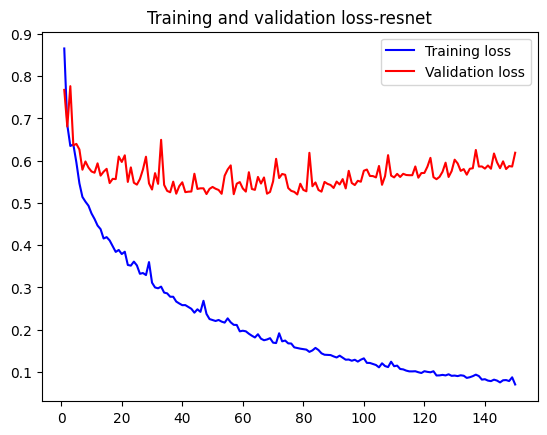

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy-resnet")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss-resnet")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_resnet.predict(X_test)

5/5 [==============================] - 1s 127ms/step


In [ ]:
#Save the model to disk
model_resnet.save("my_model.h6")

In [ ]:
#Predict on test data
test_loss, test_acc= model_resnet.evaluate(X_test, y_test, verbose=2)


5/5 - 1s - loss: 0.5104 - accuracy: 0.8354 - 601ms/epoch - 120ms/step


Evaluation criteria for Resnet-NONcombined
Label 0: Sensitivity 78.79%, Specificity 87.20%
Label 1: Sensitivity 83.64%, Specificity 81.25%
Label 2: Sensitivity 86.67%, Specificity 99.30%
Confusion Matrix for Label 0:
 [[109  16]
 [  7  26]]


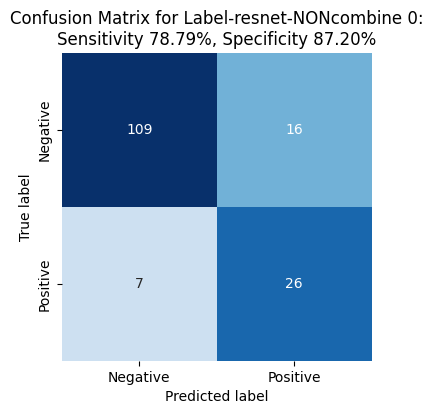

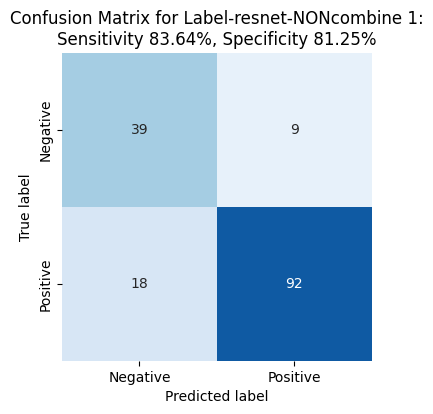

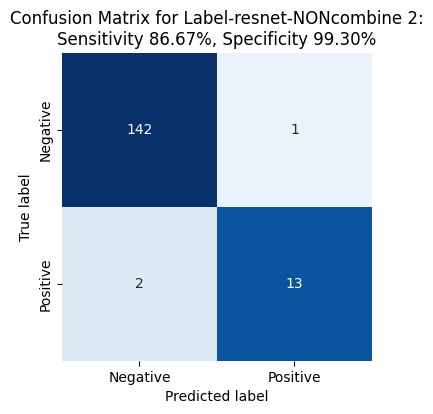

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for Resnet-NONcombined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-resnet-NONcombine {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


5/5 [==============================] - 1s 120ms/step


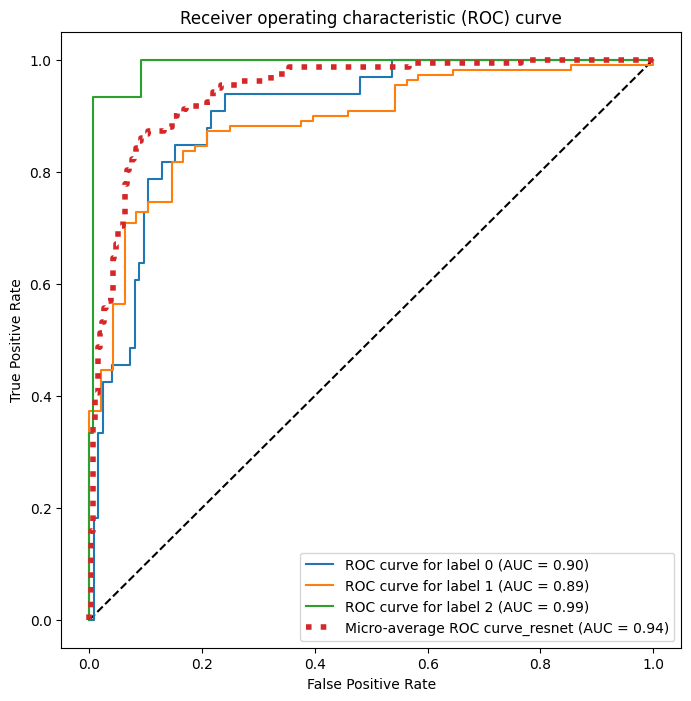

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_resnet.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve_resnet (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


**MobileNet/single modal**

In [ ]:
from tensorflow.keras.applications import MobileNet
MobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in MobileNet.layers:
  layer.trainable= False

In [ ]:
# Create the ResNet model
base_model = keras.applications.MobileNet(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)

# Freeze the base model
base_model.trainable = False

# Add the classification head
inputs = keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_MobileNet2 = keras.Model(inputs, outputs)

# Compile the model
model_MobileNet2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_MobileNet2.fit(x=X_train,y=y_train,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    epochs=150, verbose=1,callbacks=callbacks)

Epoch 1/150
36/36 [==============================] - 6s 97ms/step - loss: 0.5657 - accuracy: 0.6093 - val_loss: 0.4706 - val_accuracy: 0.7077
Epoch 2/150
36/36 [==============================] - 2s 68ms/step - loss: 0.4498 - accuracy: 0.6949 - val_loss: 0.4574 - val_accuracy: 0.7077
Epoch 3/150
36/36 [==============================] - 2s 66ms/step - loss: 0.4418 - accuracy: 0.7063 - val_loss: 0.4459 - val_accuracy: 0.7007
Epoch 4/150
36/36 [==============================] - 2s 63ms/step - loss: 0.4331 - accuracy: 0.7108 - val_loss: 0.4484 - val_accuracy: 0.7077
Epoch 5/150
36/36 [==============================] - 2s 63ms/step - loss: 0.4255 - accuracy: 0.7125 - val_loss: 0.4543 - val_accuracy: 0.7007
Epoch 6/150
36/36 [==============================] - 2s 61ms/step - loss: 0.4263 - accuracy: 0.7169 - val_loss: 0.4316 - val_accuracy: 0.7113
Epoch 7/150
36/36 [==============================] - 2s 69ms/step - loss: 0.4138 - accuracy: 0.7143 - val_loss: 0.4270 - val_accuracy: 0.7148
Epoch 

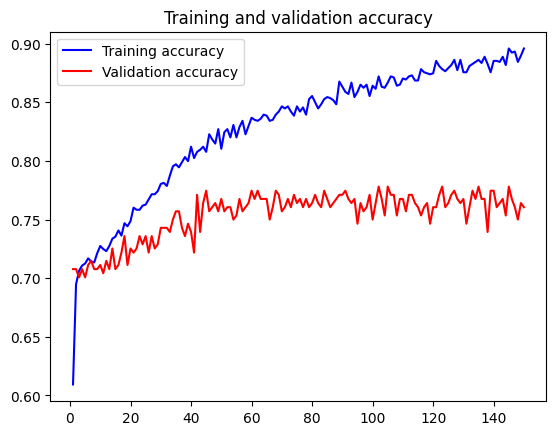

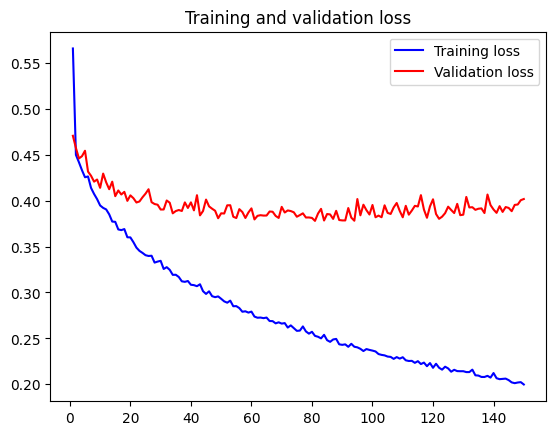

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_MobileNet2.predict(X_test)

5/5 [==============================] - 1s 47ms/step


In [ ]:
#Save the model to disk
model_MobileNet.save("my_model.h7")

In [ ]:
#Predict on test data
test_loss, test_acc= model_MobileNet2.evaluate(X_test, y_test, verbose=2)


5/5 - 0s - loss: 0.3160 - accuracy: 0.7911 - 356ms/epoch - 71ms/step


Evaluation criteria for MobileNet-NONcombined
Label 0: Sensitivity 57.58%, Specificity 90.40%
Label 1: Sensitivity 86.36%, Specificity 62.50%
Label 2: Sensitivity 46.67%, Specificity 97.90%
Confusion Matrix for Label 0:
 [[113  12]
 [ 14  19]]


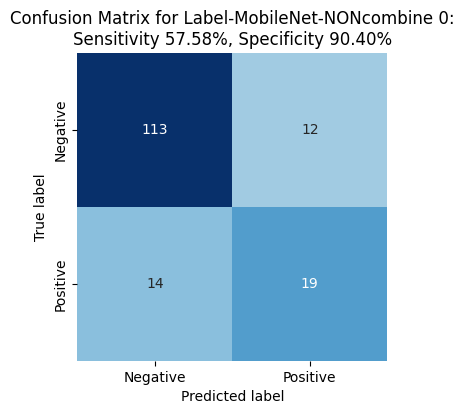

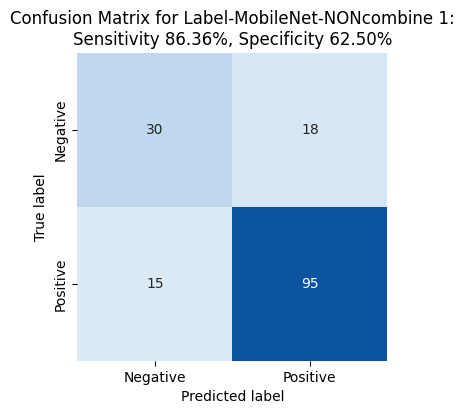

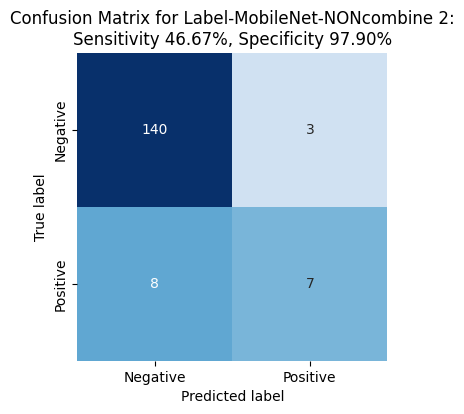

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for MobileNet-NONcombined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-MobileNet-NONcombine {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


5/5 [==============================] - 0s 58ms/step


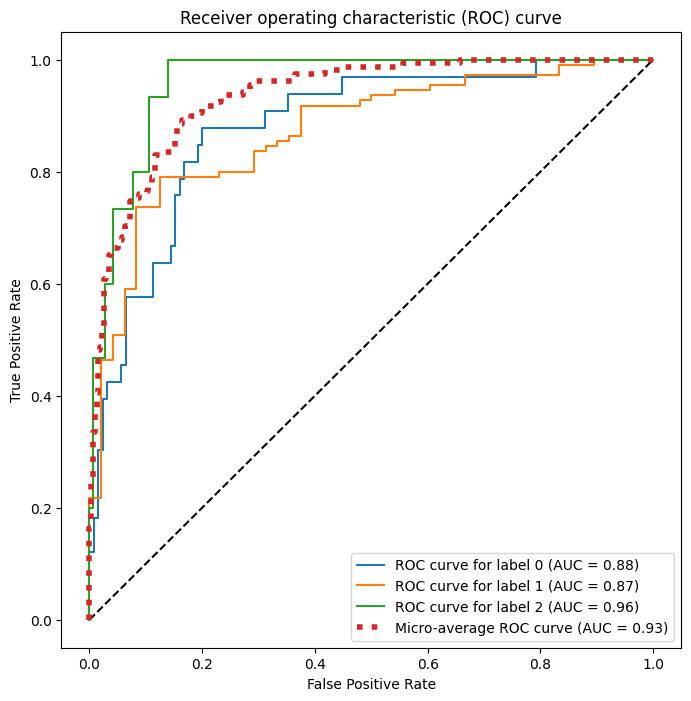

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_MobileNet2.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


**ACl-MobileNet/single modal**

In [ ]:
from tensorflow.keras.applications import MobileNet
MobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in MobileNet.layers:
  layer.trainable= False

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_MobileNet = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = keras.applications.mobilenet.preprocess_input(x)
x = keras.applications.MobileNet(include_top=False, input_shape=(256, 256, 3))(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_MobileNet = keras.Model(inputs, outputs)
model_MobileNet.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])


In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [ ]:
model_MobileNet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 256, 256, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                           

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history = model_MobileNet.fit(x=X_train,y=y_train,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    epochs=150, verbose=1,callbacks=callbacks)

Epoch 1/150
36/36 [==============================] - 6s 170ms/step - loss: 0.3005 - accuracy: 0.8792 - val_loss: 0.6685 - val_accuracy: 0.7746
Epoch 2/150
36/36 [==============================] - 6s 168ms/step - loss: 0.2989 - accuracy: 0.8854 - val_loss: 1.2990 - val_accuracy: 0.7218
Epoch 3/150
36/36 [==============================] - 6s 158ms/step - loss: 0.3258 - accuracy: 0.8765 - val_loss: 0.8586 - val_accuracy: 0.7711
Epoch 4/150
36/36 [==============================] - 6s 163ms/step - loss: 0.3184 - accuracy: 0.8862 - val_loss: 0.6842 - val_accuracy: 0.7958
Epoch 5/150
36/36 [==============================] - 6s 167ms/step - loss: 0.3146 - accuracy: 0.8748 - val_loss: 0.8812 - val_accuracy: 0.7641
Epoch 6/150
36/36 [==============================] - 5s 151ms/step - loss: 0.2973 - accuracy: 0.8915 - val_loss: 0.5744 - val_accuracy: 0.7606
Epoch 7/150
36/36 [==============================] - 6s 158ms/step - loss: 0.2837 - accuracy: 0.8862 - val_loss: 0.6436 - val_accuracy: 0.7887

In [ ]:
#Save the model to disk
model_MobileNet.save2("my_model.h5")

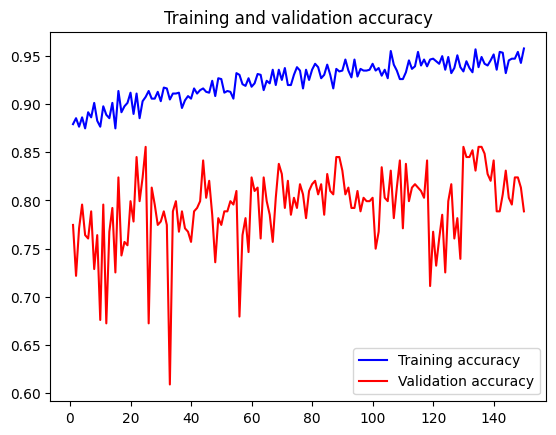

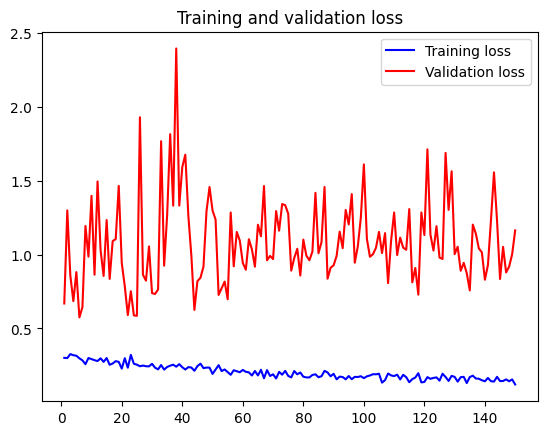

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_MobileNet.predict(X_test)

5/5 [==============================] - 0s 47ms/step


In [ ]:
#Predict on test data
test_loss, test_acc= model_MobileNet.evaluate(X_test, y_test, verbose=2)
#Save the model to disk
#model_MobileNet.save2("my_model.h5")

5/5 - 0s - loss: 0.8270 - accuracy: 0.7722 - 208ms/epoch - 42ms/step


Evaluation criteria for MobileNet-NONcombined
Label 0: Sensitivity 69.70%, Specificity 83.20%
Label 1: Sensitivity 80.91%, Specificity 72.92%
Label 2: Sensitivity 66.67%, Specificity 99.30%
Confusion Matrix for Label 0:
 [[104  21]
 [ 10  23]]


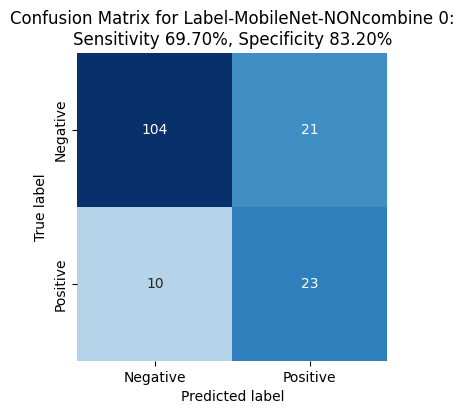

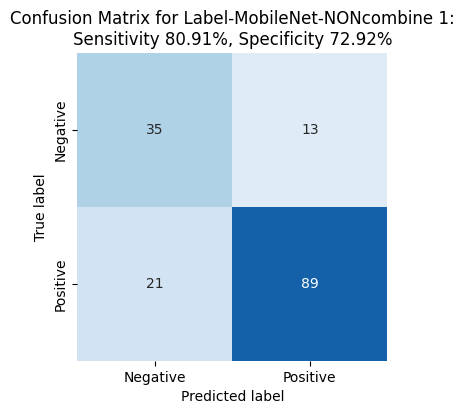

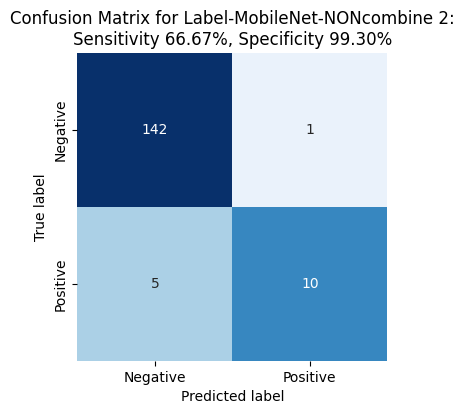

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for MobileNet-NONcombined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-MobileNet-NONcombine {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


5/5 [==============================] - 0s 37ms/step


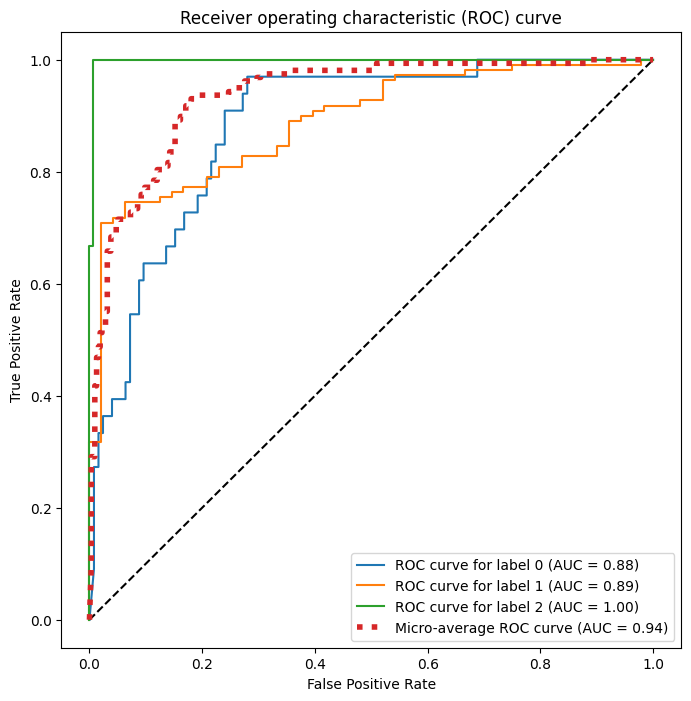

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_MobileNet.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


**ACD-ResNet-single modal**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create the ResNet model
base_model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)

# Freeze the base model
base_model.trainable = False

inputs = keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)

model_resnet_morelayers = keras.Model(inputs=inputs, outputs=outputs)
model_resnet_morelayers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history = model_resnet_morelayers.fit(x=X_train,y=y_train,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    epochs=100, verbose=1,callbacks=callbacks)

Epoch 1/100
40/40 [==============================] - 19s 121ms/step - loss: 11.7809 - accuracy: 0.6206 - val_loss: 0.7950 - val_accuracy: 0.6962
Epoch 2/100
40/40 [==============================] - 3s 71ms/step - loss: 0.7520 - accuracy: 0.7032 - val_loss: 0.7690 - val_accuracy: 0.6994
Epoch 3/100
40/40 [==============================] - 3s 76ms/step - loss: 0.7284 - accuracy: 0.7016 - val_loss: 0.7231 - val_accuracy: 0.7057
Epoch 4/100
40/40 [==============================] - 3s 73ms/step - loss: 0.7084 - accuracy: 0.7048 - val_loss: 0.7019 - val_accuracy: 0.7120
Epoch 5/100
40/40 [==============================] - 3s 70ms/step - loss: 0.6863 - accuracy: 0.7246 - val_loss: 0.7180 - val_accuracy: 0.7025
Epoch 6/100
40/40 [==============================] - 3s 75ms/step - loss: 0.6415 - accuracy: 0.7516 - val_loss: 0.6666 - val_accuracy: 0.7278
Epoch 7/100
40/40 [==============================] - 3s 73ms/step - loss: 0.6125 - accuracy: 0.7603 - val_loss: 0.6916 - val_accuracy: 0.7310
Epo

In [ ]:
model_resnet_morelayers.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 128)       7385

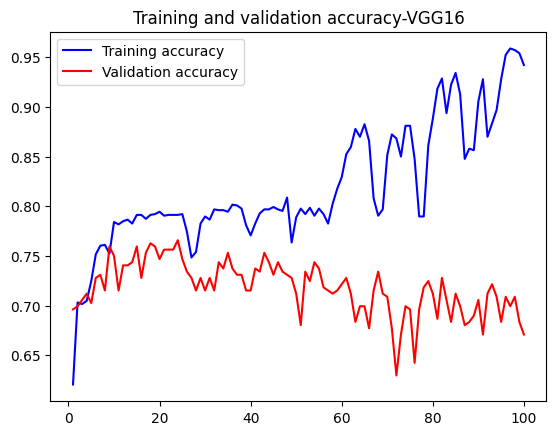

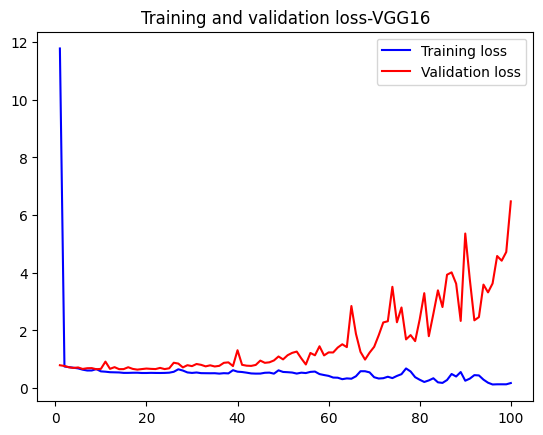

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy-VGG16")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss-VGG16")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_resnet_morelayers.predict(X_test)

10/10 [==============================] - 0s 26ms/step


Evaluation criteria for VGG16-NONcombined
Label 0: Sensitivity 36.36%, Specificity 87.20%
Label 1: Sensitivity 82.27%, Specificity 48.96%
Label 2: Sensitivity 16.67%, Specificity 94.06%
Confusion Matrix for Label 0:
 [[218  32]
 [ 42  24]]


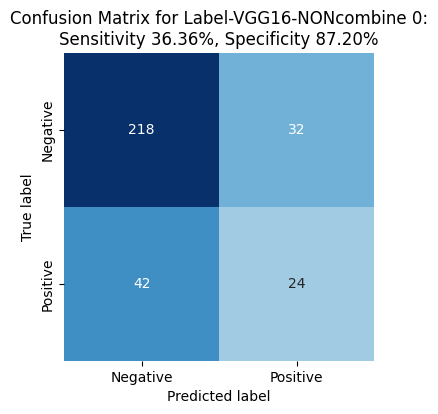

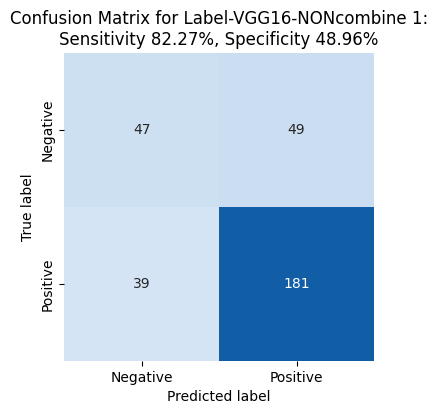

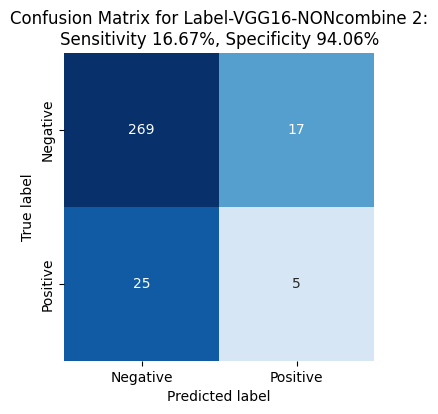

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for VGG16-NONcombined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-VGG16-NONcombine {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


10/10 [==============================] - 0s 25ms/step


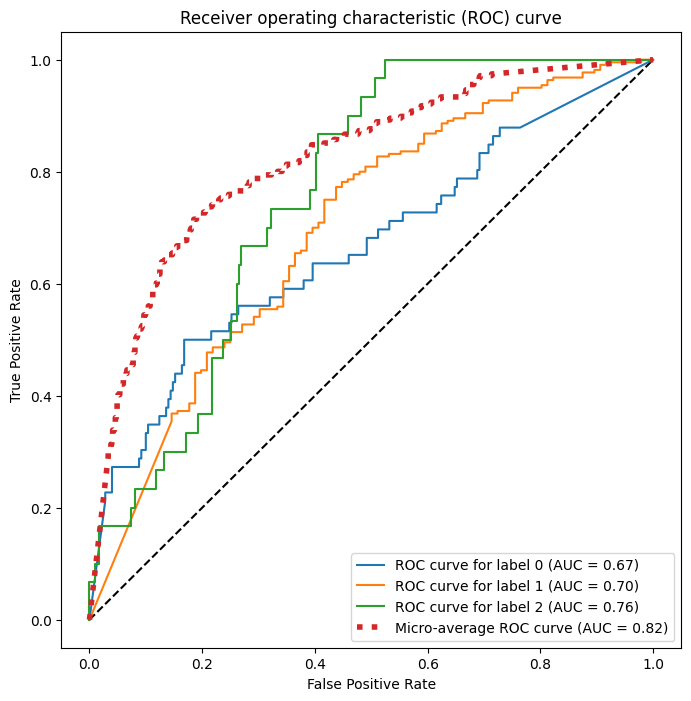

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_resnet_morelayers.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


# **(DWI and ADC combined)**

In [ ]:
# Set the path to your .dcm DWI image folder
dwi_dir = "/content/drive/MyDrive/Stroke Detection/unzip-dwi stroke detection/dwi for detection stroke"
csvDWI_path = "/content/drive/MyDrive/Stroke Detection/detection type of stroke.csv"

In [ ]:
# Set the path to your .dcm ADC image folder
adc_dir = "//content/drive/MyDrive/Stroke Detection/unzip-adc stroke detection/adc for detection stroke"
csvADC_path = "/content/drive/MyDrive/Stroke Detection/detection type of stroke.csv"

In [ ]:
# Set the target image size
imge_size = (256, 256)

In [ ]:
# Load the DWIlabels from the CSV file into a pandas DataFrame
dwi_labels_df = pd.read_csv(csvDWI_path)
# Load the ADClabels from the CSV file into a pandas DataFrame
adc_labels_df = pd.read_csv(csvADC_path)

In [ ]:
dwi_labels_df

ID    Label 
0      7 (1)  ischemic
1      7 (2)  ischemic
2      7 (3)  ischemic
3     12 (1)  ischemic
4     12 (2)  ischemic
..       ...       ...
458  110 (3)  ischemic
459  110 (4)  ischemic
460  110 (5)  ischemic
461  111 (1)  ischemic
462  111 (2)  ischemic

[463 rows x 2 columns]

In [ ]:
adc_labels_df

ID    Label 
0      7 (1)  ischemic
1      7 (2)  ischemic
2      7 (3)  ischemic
3     12 (1)  ischemic
4     12 (2)  ischemic
..       ...       ...
458  110 (3)  ischemic
459  110 (4)  ischemic
460  110 (5)  ischemic
461  111 (1)  ischemic
462  111 (2)  ischemic

[463 rows x 2 columns]

In [ ]:
# Merge the DWI and ADC labels based on the filenames
labels_df = pd.merge(dwi_labels_df, adc_labels_df, on="ID")

In [ ]:
labels_df

ID  Label _x  Label _y
0      7 (1)  ischemic  ischemic
1      7 (2)  ischemic  ischemic
2      7 (3)  ischemic  ischemic
3     12 (1)  ischemic  ischemic
4     12 (2)  ischemic  ischemic
..       ...       ...       ...
458  110 (3)  ischemic  ischemic
459  110 (4)  ischemic  ischemic
460  110 (5)  ischemic  ischemic
461  111 (1)  ischemic  ischemic
462  111 (2)  ischemic  ischemic

[463 rows x 3 columns]

In [ ]:
dcmHandler = pydicom.dcmread("/content/drive/MyDrive/Untitled folder/Stroke Detection/data testi/ADC/Untitled folder/normal (3).dcm")
# Show pixel image size
print("Pixel Image Size-ADC: ", dcmHandler.pixel_array.shape)
dcmHandler = pydicom.dcmread("/content/drive/MyDrive/Untitled folder/Stroke Detection/data testi/DWI-Tracew/Untitled folder/normal (3).dcm")
# Show pixel image size
print("Pixel Image Size-DWI: ", dcmHandler.pixel_array.shape)

Pixel Image Size-ADC:  (260, 260)
Pixel Image Size-DWI:  (260, 260)


In [ ]:
dwi_ext = '.dcm'
adc_ext = '.dcm'

(256, 256, 3)


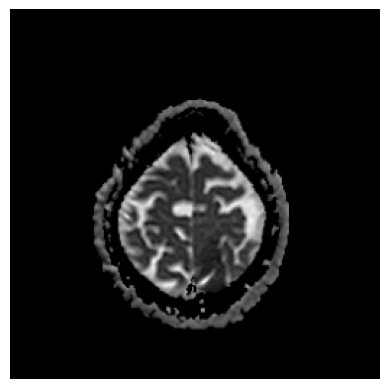

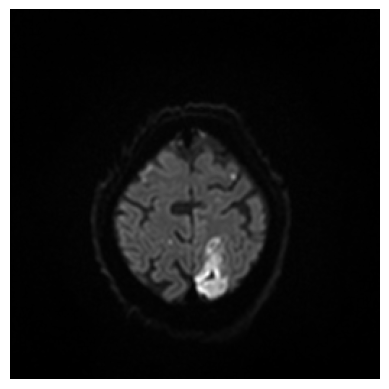

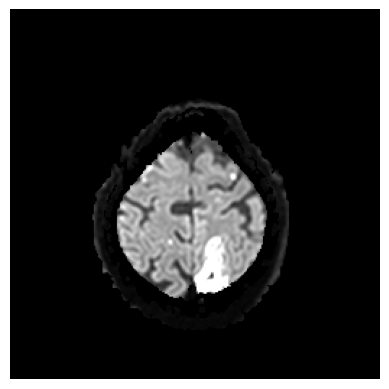

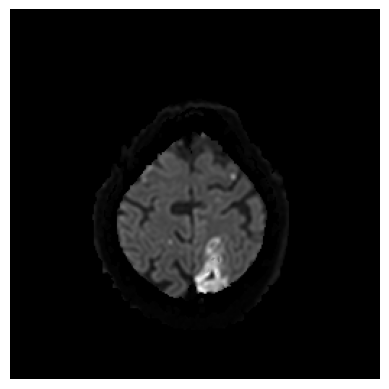

(256, 256, 3)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom
from skimage.color import rgb2gray

# set paths to ADC and DWI DICOM files
adc_path = '/content/drive/MyDrive/Untitled folder/Stroke Detection/unzip-adc stroke detection/adc for detection stroke/90 (15).dcm'
dwi_path = '/content/drive/MyDrive/Untitled folder/Stroke Detection/unzip-dwi stroke detection/dwi for detection stroke/90 (15).dcm'

# read in DICOM files
adc = pydicom.read_file(adc_path).pixel_array
dwi = pydicom.read_file(dwi_path).pixel_array
adc = cv2.resize(adc, (256, 256))
dwi = cv2.resize(dwi, (256, 256))
# combine ADC and DWI into a single 3D array
combined = np.stack([adc, dwi], axis=-1)
gray = np.min(combined, axis=-1)
X = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
# convert to grayscale
print(X.shape)
image =  cv2.normalize(src=X, dst=X, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

plt.imshow(adc, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(dwi, cmap='gray')
plt.axis('off')
plt.show()

# display grayscale image
plt.imshow(X, cmap='gray')
plt.axis('off')
plt.show()

# display grayscale image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

image.shape

In [ ]:
#function for Load the images and preprocessing them
def load_images_ischemic(filename):
    # Load the ADC image
    adc_file = os.path.join(adc_dir, filename + adc_ext)
    adc = pydicom.read_file(adc_file).pixel_array


    # Load the DWI image
    dwi_file = os.path.join(dwi_dir, filename + dwi_ext)
    dwi = pydicom.read_file(dwi_file).pixel_array
    adc = cv2.resize(adc, (256, 256))
    dwi = cv2.resize(dwi, (256, 256))

    combined = np.stack([adc, dwi], axis=-1)
    gray = np.min(combined, axis=-1)
    X = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    # convert to grayscale
    #print(X.shape)
    image =  cv2.normalize(src=X, dst=X, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

    #print(image.shape)
    return image

In [ ]:
labels_df = labels_df.rename(columns={'Label _x': 'Label_x', 'Label _y': 'Label_y'})

In [ ]:
# Load the images and labels into numpy arrays
X_combine = []
y_combine = []
for filename, dwi_label, adc_label in zip(labels_df['ID'], labels_df['Label_x'], labels_df['Label_y']):
      image = load_images_ischemic(filename)
      if image is not None:
         X_combine.append(image)
         y_combine.append(1)

In [ ]:
len_X_combine= len(X_combine)
len_y_combine= len(y_combine)
print("len_y_combine:",len_y_combine,"len_X_combine:",len_X_combine)

len_y_combine: 463 len_X_combine: 463


In [ ]:
#Normal images path
NORMAL_IMAGE="/content/drive/MyDrive/Stroke Detection/all normal images"
CSV_NORMAL="/content/drive/MyDrive/Stroke Detection/all normal images/normal images.csv"

In [ ]:
# Show pixel image size
dcmHandler = pydicom.dcmread("/content/drive/MyDrive/Stroke Detection/all normal images/ADC-normal (1).dcm")
print("Pixel Image Size-normal: ", dcmHandler.pixel_array.shape)

Pixel Image Size-normal:  (260, 260)


(256, 256, 3)


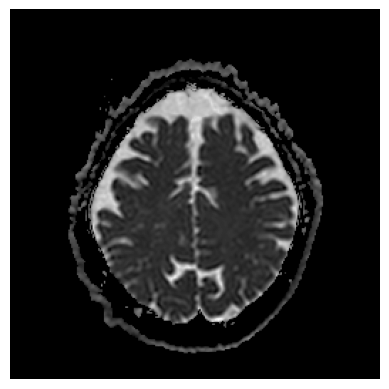

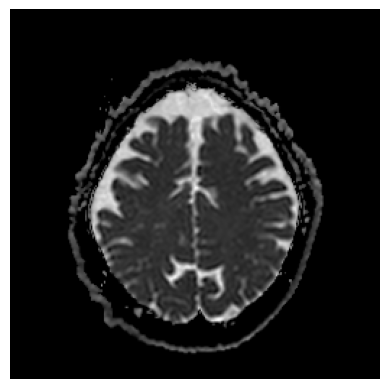

(256, 256, 3)

In [ ]:
# read in DICOM files
import numpy as np
from PIL import Image

bb = '/content/drive/MyDrive/Stroke Detection/all normal images/ADC-normal (3).dcm'
nr = pydicom.read_file(bb).pixel_array
norm = cv2.resize(nr, (256, 256))
# combine ADC and DWI into a single 3D array
combined = np.stack([norm, norm], axis=-1)
gray = np.min(combined, axis=-1)
X = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
# convert to grayscale
print(X.shape)
image =  cv2.normalize(src=X, dst=X, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

#print(image_normal.shape)
# Convert to PIL Image and save as PNG
plt.imshow(nr,cmap='gray')
plt.axis('off')
plt.show()

# display grayscale image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
image.shape


In [ ]:
import numpy as np
from PIL import Image

bb = '/content/drive/MyDrive/Untitled folder/Stroke Detection/all normal images/ADC-normal (3).dcm'
nr = pydicom.read_file(bb).pixel_array
norm = cv2.resize(nr, (256, 256))
# Normalize the DWI data using exposure equalization
normal_data = exposure.equalize_hist(norm)

# Rescale the image data between 0 and 1
normal_data = img_as_float(normal_data)

# Combine the ADC and DWI images into a single 3D array
image = np.stack([dwi_image, adc_image], axis=-1)
image =  cv2.normalize(src=X, dst=X, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

print(image_normal.shape)
# Convert to PIL Image and save as PNG
plt.imshow(norm,cmap='gray')
plt.axis('off')
plt.show()

# display grayscale image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
image.shape


In [ ]:
NORMAL_labels_df = pd.read_csv(CSV_NORMAL)

In [ ]:
NORMAL_labels_df

ID   lable
0      ADC-normal (1)  normal
1      ADC-normal (2)  normal
2      ADC-normal (3)  normal
3      ADC-normal (4)  normal
4      ADC-normal (5)  normal
..                ...     ...
324  DWI-normal (146)  normal
325  DWI-normal (147)  normal
326  DWI-normal (148)  normal
327  DWI-normal (149)  normal
328  DWI-normal (150)  normal

[329 rows x 2 columns]

In [ ]:
#function for Load the images and preprocessing them
def load_images_normal2(filename):
    # Load  image
    normal_file = os.path.join(NORMAL_IMAGE, filename + adc_ext)
    normal_dcm = pydicom.dcmread(normal_file)
    normal_image = normal_dcm.pixel_array
    normal_image = cv2.resize(normal_image, (256, 256))


     #PREPROCCESING
     # Normalize the DWI data using exposure equalization
    #normal_data = exposure.equalize_hist(normal_image)

   # Rescale the image data between 0 and 1
    #normal_data = img_as_float(normal_data)

    # Combine the ADC and DWI images into a single 3D array
    #image = np.stack([dwi_image, adc_image], axis=-1)
    image_normal = np.stack([normal_image, normal_image], axis=-1)
    gray = np.min(image_normal, axis=-1)
    X = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    image =  cv2.normalize(src=X, dst=X, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

    return image


In [ ]:
# Load the images and labels into numpy arrays

for filename, notmal_label in zip(NORMAL_labels_df['ID'], NORMAL_labels_df['lable']):
    image_normal = load_images_normal2(filename)
    if image is not None:
      # Apply alignment to the images
        #image = transform.rotate(image, -90, resize=True)
        X_combine.append(image)
        #if dwi_label == 'stroke' or adc_label == 'stroke':
        y_combine.append(0)
        #else:
            #y.append(0)


In [ ]:
len_x= len(X_combine)
len_y= len(y_combine)
print("len_y_combine:",len_y,"len_x_combine:",len_x)

len_y_combine: 792 len_x_combine: 792


**Load Hemorrahgic Images**

In [ ]:
#hemorrahgic images path
hemorrahgic_IMAGE="/content/drive/MyDrive/Stroke Detection/hemorragic/unzip-hemorragic/all slices-finall(TRACEW only)"
CSV_hemorrahgic="/content/drive/MyDrive/Stroke Detection/hemorragic/hemorrhagic-finall(TRACEW only).csv"

In [ ]:
# Show pixel image size
dcmHandler = pydicom.dcmread("/content/drive/MyDrive/Stroke Detection/hemorragic/unzip-hemorragic/all slices-finall(TRACEW only)/h (1).dcm")
print("Pixel Image Size-hemorrhagic: ", dcmHandler.pixel_array.shape)

Pixel Image Size-hemorrhagic:  (260, 260)


In [ ]:
hemorrahgic_labels_df = pd.read_csv(CSV_hemorrahgic)

In [ ]:
hemorrahgic_labels_df = hemorrahgic_labels_df.drop('Unnamed: 2', axis=1)

In [ ]:
hemorrahgic_labels_df

ID        lable
0      h (1)  hemorrhagic
1      h (2)  hemorrhagic
2      h (3)  hemorrhagic
3      h (4)  hemorrhagic
4      h (5)  hemorrhagic
..       ...          ...
145  h (146)  hemorrhagic
146  h (147)  hemorrhagic
147  h (148)  hemorrhagic
148  h (149)  hemorrhagic
149  h (150)  hemorrhagic

[150 rows x 2 columns]

In [ ]:
def load_images_hemorr2(filename):
    # Load image
    hemorr_file = os.path.join(hemorrahgic_IMAGE, filename + adc_ext)
    hemorr_dcm = pydicom.dcmread(hemorr_file)
    hemorr_image = hemorr_dcm.pixel_array
    hemorr_image = cv2.resize(hemorr_image, (256, 256))

    image_hemorr = np.stack([hemorr_image, hemorr_image], axis=-1)
    gray = np.min(image_hemorr, axis=-1)
    X = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    image =  cv2.normalize(src=X, dst=X, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

    return image

In [ ]:
# Load the images and labels into numpy arrays

for filename, hemorr_label in zip(hemorrahgic_labels_df['ID'], hemorrahgic_labels_df['lable']):
    image = load_images_hemorr2(filename)
    if image is not None:
      # Apply alignment to the images
        #image = transform.rotate(image, -90, resize=True)
        X_combine.append(image)
        #if dwi_label == 'stroke' or adc_label == 'stroke':
        y_combine.append(2)
        #else:
            #y.append(0)

In [ ]:
len_x= len(X_combine)
len_y= len(y_combine)
print("len_y_combine:",len_y,"len_x_combine:",len_x)

len_y_combine: 942 len_x_combine: 942


In [ ]:
# Convert the image data to a numpy array
X_combine = np.array(X_combine)

# Convert labels to categorical
y_combine = to_categorical(y_combine, num_classes=3)

# Print shapes of X and y
print("X shape:", X_combine.shape)
print("y shape:", y_combine.shape)

X shape: (942, 256, 256, 3)
y shape: (942, 3)


In [ ]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combine, y_combine, test_size=0.2, random_state=42, stratify=y_combine)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(753, 3)
(189, 3)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(753, 256, 256, 3)
(189, 256, 256, 3)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.RandomBrightness(0.3),
        layers.RandomContrast(0.2),
        #layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        #layers.RandomRotation(factor=0.2),
        #layers.GaussianNoise(stddev=0.01)
    ]
)

In [ ]:
# Create an image data generator object to apply data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=data_augmentation,
    validation_split=0.2
)

# Create the training data generator
train_generator = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
    shuffle=True,
    subset='training'
)

# Create the validation data generator
val_generator = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
    shuffle=True,
    subset='validation'
)


**ACL-Mobilnet/multimodal**

In [ ]:
from tensorflow.keras.applications import MobileNet
MobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in MobileNet.layers:
  layer.trainable= False

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_MobileNet = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = keras.applications.mobilenet.preprocess_input(x)
x = keras.applications.MobileNet(include_top=False, input_shape=(256, 256, 3))(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_MobileNet = keras.Model(inputs, outputs)
model_MobileNet.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])


In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [ ]:
model_MobileNet.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, None, None, None)  0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 256, 256, 3)      0         
 bda)                                                            
                                                                 
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                          

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history = model_MobileNet.fit(train_generator,
                    batch_size=32,
                    validation_data=val_generator,
                    epochs=100, verbose=1,callbacks=callbacks)

Epoch 1/100
19/19 [==============================] - 84s 3s/step - loss: 156.4259 - accuracy: 0.5025 - val_loss: 618.5504 - val_accuracy: 0.3267
Epoch 2/100
19/19 [==============================] - 30s 2s/step - loss: 5.5713 - accuracy: 0.6368 - val_loss: 76.7776 - val_accuracy: 0.3800
Epoch 3/100
19/19 [==============================] - 31s 2s/step - loss: 2.7070 - accuracy: 0.6633 - val_loss: 64.1309 - val_accuracy: 0.3267
Epoch 4/100
19/19 [==============================] - 30s 2s/step - loss: 2.8597 - accuracy: 0.6186 - val_loss: 112.7247 - val_accuracy: 0.3267
Epoch 5/100
19/19 [==============================] - 30s 2s/step - loss: 3.4886 - accuracy: 0.5970 - val_loss: 37.1219 - val_accuracy: 0.6000
Epoch 6/100
19/19 [==============================] - 31s 2s/step - loss: 2.7393 - accuracy: 0.6932 - val_loss: 26.9937 - val_accuracy: 0.7800
Epoch 7/100
19/19 [==============================] - 30s 2s/step - loss: 1.5926 - accuracy: 0.7910 - val_loss: 23.2202 - val_accuracy: 0.7133
Ep

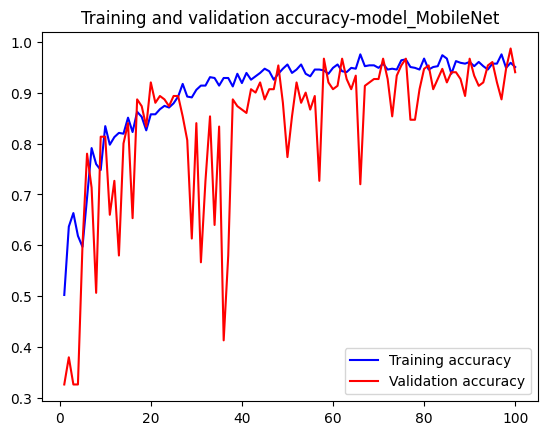

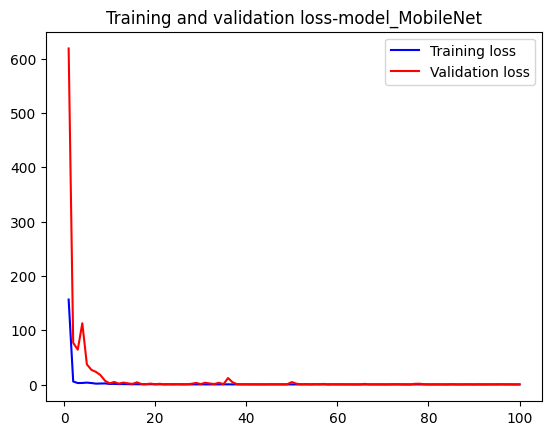

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy-model_MobileNet")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss-model_MobileNet")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_MobileNet.predict(X_test)

6/6 [==============================] - 1s 51ms/step


In [ ]:
#Save the model to disk
model_MobileNet.save("my_model.h12")

In [ ]:
#Predict on test data
test_loss, test_acc= model_MobileNet.evaluate(X_test, y_test, verbose=2)

6/6 - 1s - loss: 0.5305 - accuracy: 0.9735 - 1s/epoch - 180ms/step


Evaluation criteria for model_MobileNet-combined
Label 0: Sensitivity 100.00%, Specificity 99.19%
Label 1: Sensitivity 98.92%, Specificity 95.83%
Label 2: Sensitivity 86.67%, Specificity 100.00%
Confusion Matrix for Label 0:
 [[122   1]
 [  0  66]]


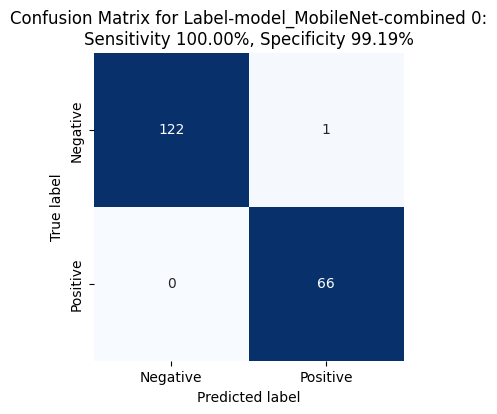

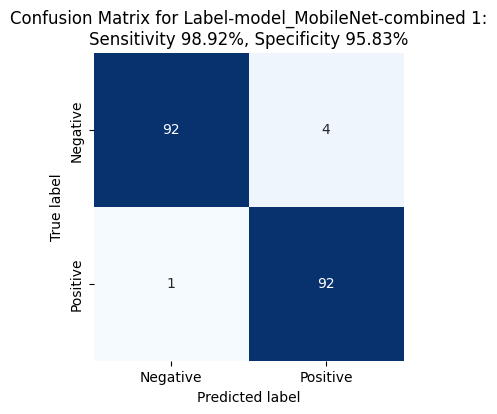

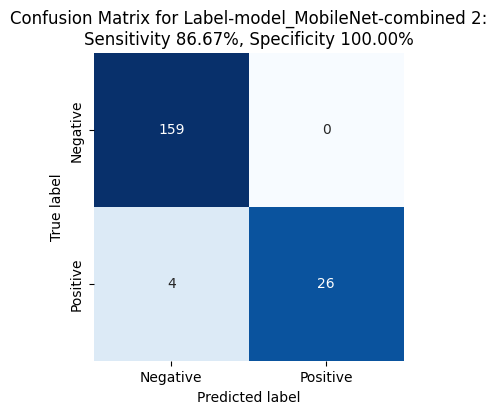

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for model_MobileNet-combined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-model_MobileNet-combined {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


6/6 [==============================] - 0s 37ms/step


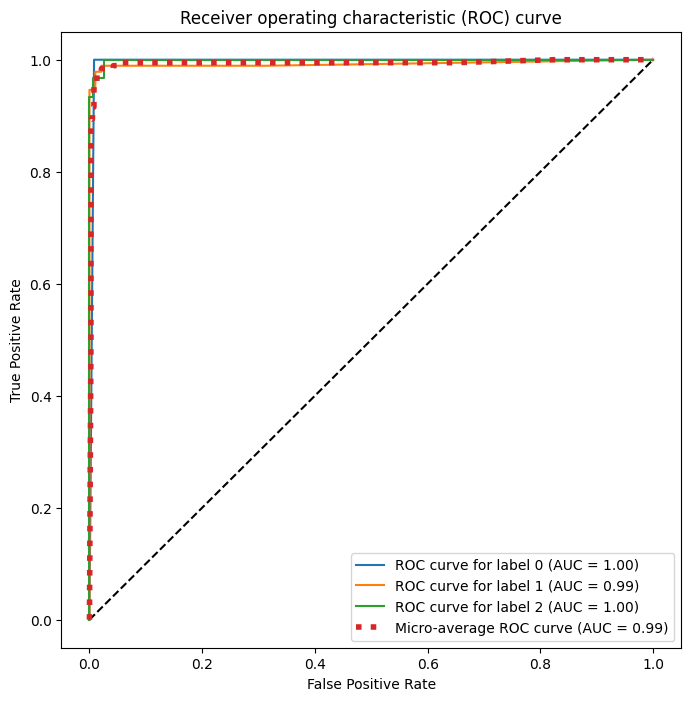

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_MobileNet_nolayer.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


**Mobilnet/multimodal**

In [ ]:
from tensorflow.keras.applications import MobileNet
MobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in MobileNet.layers:
  layer.trainable= False

In [ ]:
# Create the ResNet model
base_model = keras.applications.MobileNet(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)

# Freeze the base model
base_model.trainable = False

# Add the classification head
inputs = keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_MobileNet_nolayer = keras.Model(inputs, outputs)

# Compile the model
model_MobileNet_nolayer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_MobileNet_nolayer.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 3,231,939
Trainable params: 3,075
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history_mob = model_MobileNet_nolayer.fit(train_generator,
                    batch_size=32,
                    validation_data=val_generator,
                    epochs=100, verbose=1,callbacks=callbacks)

Epoch 1/100
19/19 [==============================] - 42s 2s/step - loss: 1.0575 - accuracy: 0.4975 - val_loss: 0.9325 - val_accuracy: 0.5467
Epoch 2/100
19/19 [==============================] - 28s 1s/step - loss: 0.8666 - accuracy: 0.5788 - val_loss: 0.7727 - val_accuracy: 0.6733
Epoch 3/100
19/19 [==============================] - 27s 1s/step - loss: 0.7979 - accuracy: 0.6617 - val_loss: 0.6963 - val_accuracy: 0.7600
Epoch 4/100
19/19 [==============================] - 27s 1s/step - loss: 0.6858 - accuracy: 0.7413 - val_loss: 0.6907 - val_accuracy: 0.7333
Epoch 5/100
19/19 [==============================] - 29s 2s/step - loss: 0.6626 - accuracy: 0.7496 - val_loss: 0.6624 - val_accuracy: 0.7600
Epoch 6/100
19/19 [==============================] - 27s 1s/step - loss: 0.6337 - accuracy: 0.7546 - val_loss: 0.6981 - val_accuracy: 0.6733
Epoch 7/100
19/19 [==============================] - 28s 1s/step - loss: 0.6036 - accuracy: 0.7662 - val_loss: 0.5930 - val_accuracy: 0.7667
Epoch 8/100
1

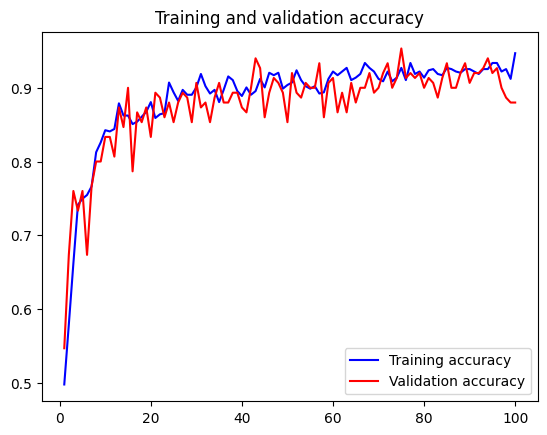

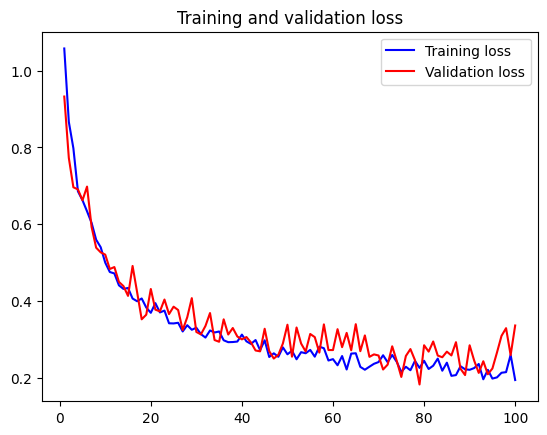

In [ ]:
import matplotlib.pyplot as plt
accuracy = history_mob.history["accuracy"]
val_accuracy = history_mob.history["val_accuracy"]
loss = history_mob.history["loss"]
val_loss = history_mob.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_MobileNet_nolayer.predict(X_test)

6/6 [==============================] - 1s 48ms/step


In [ ]:
#Save the model to disk
model_MobileNet_nolayer.save("my_model.h16")

In [ ]:
#Predict on test data
test_loss, test_acc= model_MobileNet_nolayer.evaluate(X_test, y_test, verbose=2)


6/6 - 1s - loss: 0.2394 - accuracy: 0.9947 - 821ms/epoch - 137ms/step


Evaluation criteria for MobileNet-NONcombined
Label 0: Sensitivity 100.00%, Specificity 99.19%
Label 1: Sensitivity 98.92%, Specificity 100.00%
Label 2: Sensitivity 100.00%, Specificity 100.00%
Confusion Matrix for Label 0:
 [[122   1]
 [  0  66]]


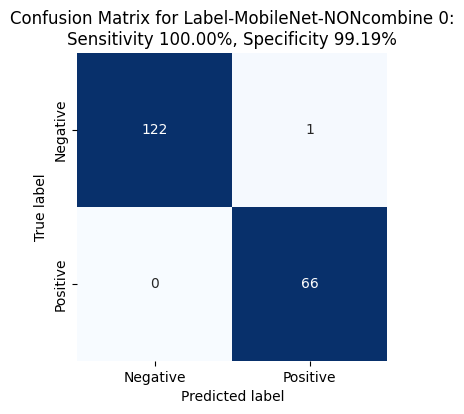

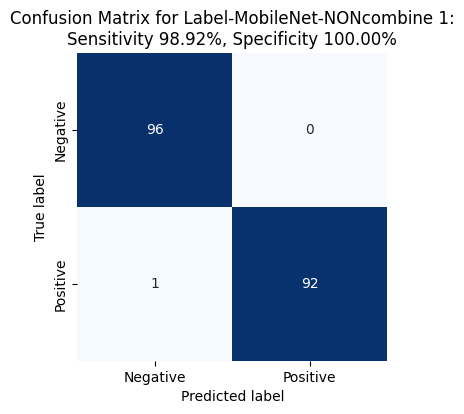

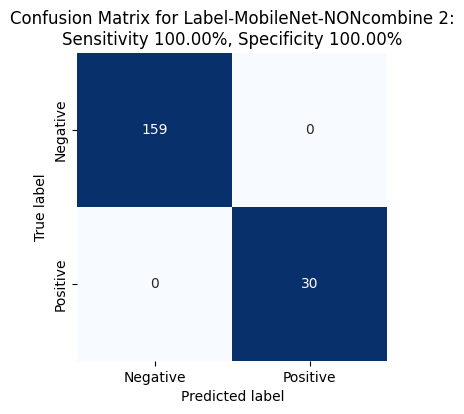

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for MobileNet-NONcombined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-MobileNet-NONcombine {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


6/6 [==============================] - 0s 37ms/step


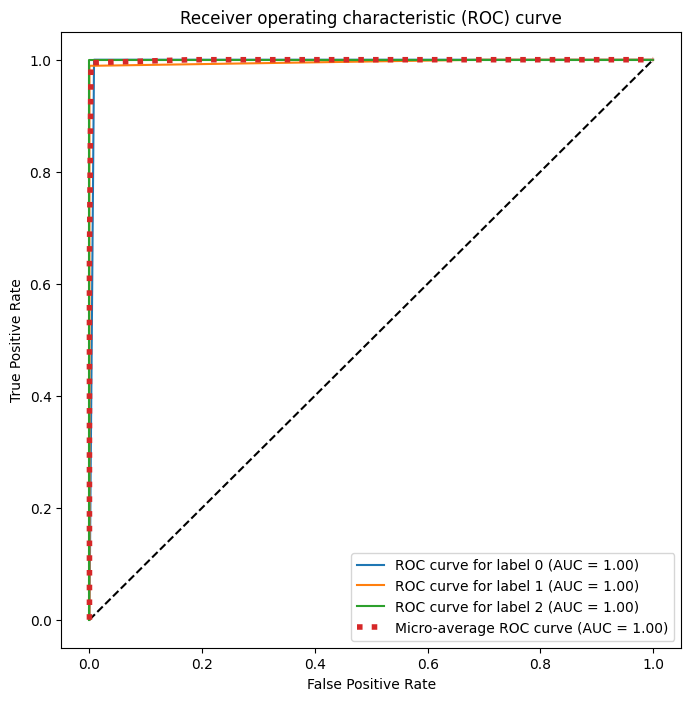

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_MobileNet_nolayer.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


**Resnet/multimodal**

In [ ]:
# Create the ResNet model
base_model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)

# Freeze the base model
base_model.trainable = False

# Add the classification head
inputs = keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_resnet_combine = keras.Model(inputs, outputs)

# Compile the model
model_resnet_combine.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model_resnet_combine.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Train the model
history = model_resnet_combine.fit(
       train_generator,
       epochs=100,
      validation_data=val_generator,
)

Epoch 1/100
19/19 [==============================] - 45s 2s/step - loss: 0.9437 - accuracy: 0.5638 - val_loss: 0.6996 - val_accuracy: 0.7200
Epoch 2/100
19/19 [==============================] - 30s 2s/step - loss: 0.5605 - accuracy: 0.8076 - val_loss: 0.4608 - val_accuracy: 0.8600
Epoch 3/100
19/19 [==============================] - 29s 2s/step - loss: 0.3892 - accuracy: 0.8939 - val_loss: 0.3601 - val_accuracy: 0.8867
Epoch 4/100
19/19 [==============================] - 29s 2s/step - loss: 0.3208 - accuracy: 0.9154 - val_loss: 0.3282 - val_accuracy: 0.9000
Epoch 5/100
19/19 [==============================] - 29s 2s/step - loss: 0.2855 - accuracy: 0.9138 - val_loss: 0.3010 - val_accuracy: 0.8933
Epoch 6/100
19/19 [==============================] - 29s 2s/step - loss: 0.2571 - accuracy: 0.9221 - val_loss: 0.2881 - val_accuracy: 0.8867
Epoch 7/100
19/19 [==============================] - 29s 2s/step - loss: 0.2490 - accuracy: 0.9270 - val_loss: 0.2504 - val_accuracy: 0.9267
Epoch 8/100
1

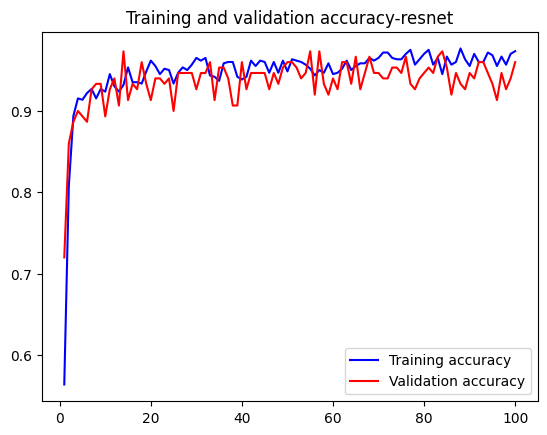

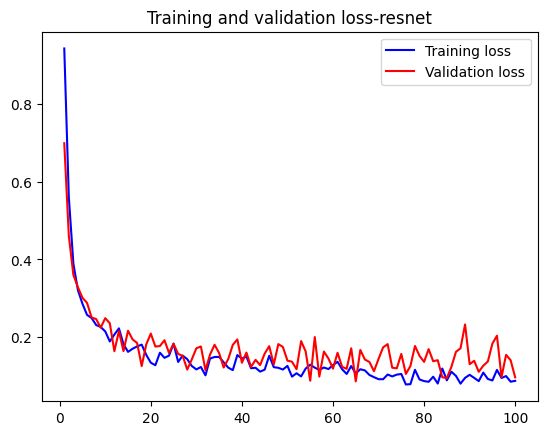

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy-resnet")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss-resnet")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_resnet_combine.predict(X_test)

6/6 [==============================] - 3s 408ms/step


In [ ]:
#Save the model to disk
model_resnet_combine.save("my_model.h13")

In [ ]:
#Predict on test data
test_loss, test_acc= model_resnet_combine.evaluate(X_test, y_test, verbose=2)


6/6 - 2s - loss: 0.0726 - accuracy: 0.9841 - 2s/epoch - 394ms/step


Evaluation criteria for Resnet-combined
Label 0: Sensitivity 100.00%, Specificity 99.19%
Label 1: Sensitivity 97.85%, Specificity 98.96%
Label 2: Sensitivity 96.67%, Specificity 99.37%
Confusion Matrix for Label 0:
 [[122   1]
 [  0  66]]


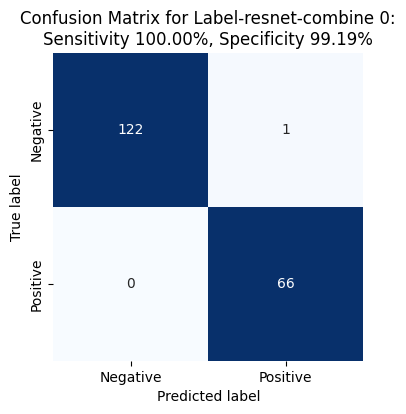

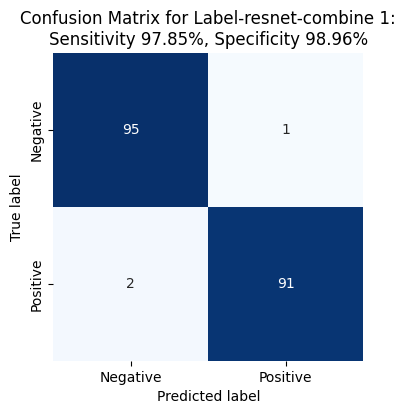

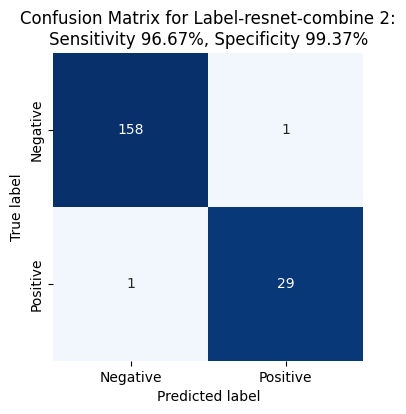

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for Resnet-combined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-resnet-combine {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


6/6 [==============================] - 1s 112ms/step


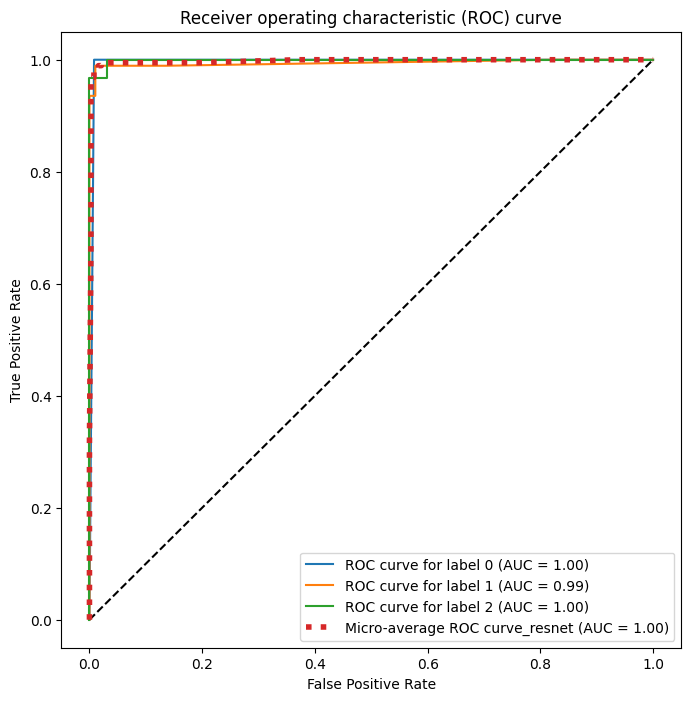

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_resnet_combine.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve_resnet (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


**ACL-Resnet/multimodal**

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Create the ResNet model
base_model = keras.applications.ResNet50(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
# Freeze the base model
base_model.trainable = False

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create the ResNet model
base_model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)

# Freeze the base model
base_model.trainable = False

inputs = keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)

model_resnet_morelayers1= keras.Model(inputs=inputs, outputs=outputs)
model_resnet_morelayers1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history = model_resnet_morelayers1.fit(train_generator,
                    batch_size=32,
                    validation_data=val_generator,
                    epochs=100, verbose=1,callbacks=callbacks)

Epoch 1/100
19/19 [==============================] - 38s 2s/step - loss: 8.3177 - accuracy: 0.4295 - val_loss: 0.9487 - val_accuracy: 0.5000
Epoch 2/100
19/19 [==============================] - 28s 2s/step - loss: 0.9818 - accuracy: 0.5589 - val_loss: 0.9193 - val_accuracy: 0.5400
Epoch 3/100
19/19 [==============================] - 34s 2s/step - loss: 0.9117 - accuracy: 0.5871 - val_loss: 0.8181 - val_accuracy: 0.6333
Epoch 4/100
19/19 [==============================] - 29s 2s/step - loss: 0.7355 - accuracy: 0.7081 - val_loss: 0.6862 - val_accuracy: 0.6933
Epoch 5/100
19/19 [==============================] - 29s 2s/step - loss: 0.6685 - accuracy: 0.7148 - val_loss: 0.6169 - val_accuracy: 0.7733
Epoch 6/100
19/19 [==============================] - 29s 2s/step - loss: 0.5686 - accuracy: 0.7662 - val_loss: 0.5247 - val_accuracy: 0.7667
Epoch 7/100
19/19 [==============================] - 29s 2s/step - loss: 0.4499 - accuracy: 0.8109 - val_loss: 0.4891 - val_accuracy: 0.8133
Epoch 8/100
1

In [ ]:
model_resnet_morelayers1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       7385

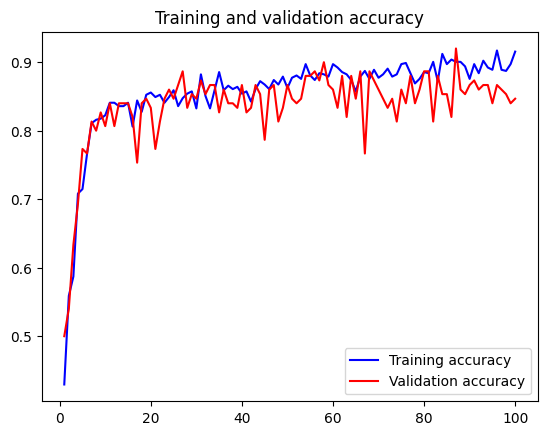

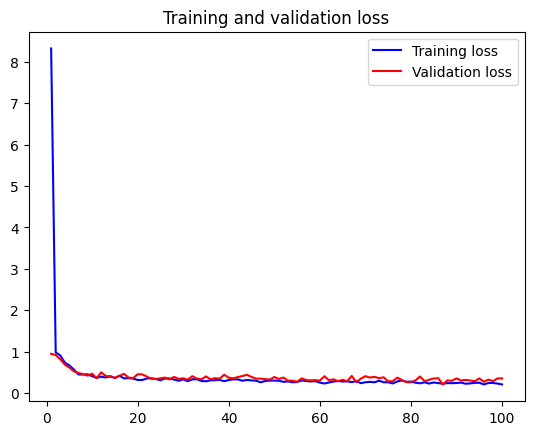

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_resnet_morelayers1.predict(X_test)

6/6 [==============================] - 1s 171ms/step


In [ ]:
#Predict on test data
test_loss, test_acc= model_resnet_morelayers1.evaluate(X_test, y_test, verbose=2)
#Save the model to disk
model_resnet_morelayers1.save("my_model.h13")

6/6 - 0s - loss: 0.3837 - accuracy: 0.8889 - 280ms/epoch - 47ms/step


Evaluation criteria for ResNet-combined
Label 0: Sensitivity 100.00%, Specificity 97.56%
Label 1: Sensitivity 90.32%, Specificity 87.50%
Label 2: Sensitivity 60.00%, Specificity 96.23%
Confusion Matrix for Label 0:
 [[120   3]
 [  0  66]]


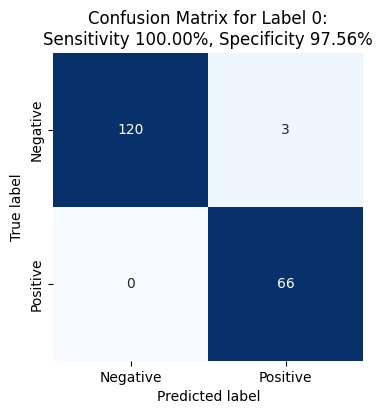

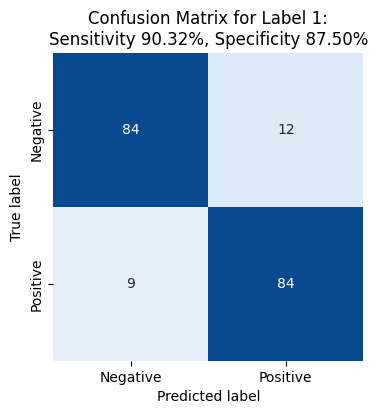

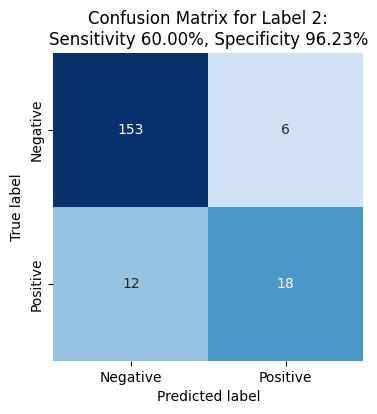

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for ResNet-combined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


6/6 [==============================] - 0s 26ms/step


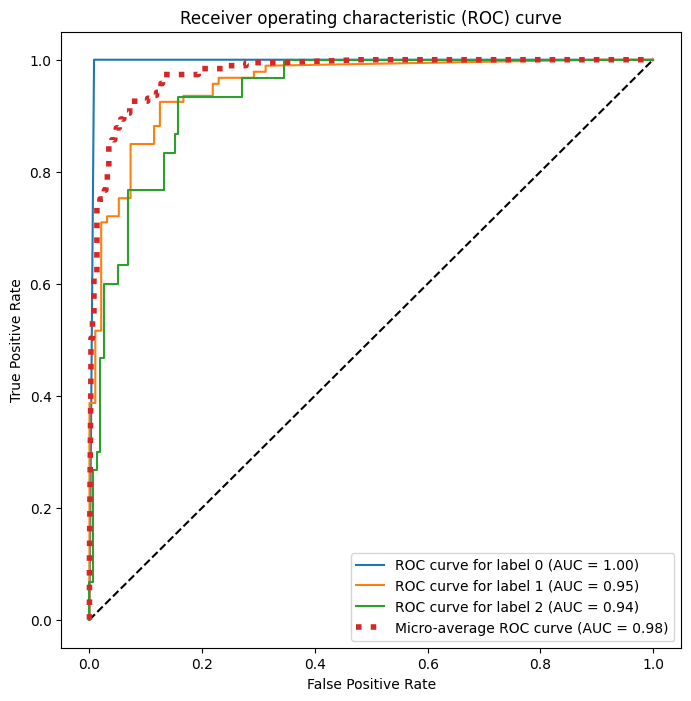

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_resnet_morelayers1.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


# **VGG16-Multimodal**

In [ ]:
# Freeze the base model
vgg16.trainable = False

# Add the classification head
inputs = keras.Input(shape=(256, 256, 3))
x = vgg16(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_vgg16 = keras.Model(inputs, outputs)

# Compile the model
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_vgg16.fit(x=X_train,y=y_train,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 25s 688ms/step - loss: 0.5639 - accuracy: 0.8393 - val_loss: 0.4592 - val_accuracy: 0.8413
Epoch 2/100
24/24 [==============================] - 5s 197ms/step - loss: 0.4205 - accuracy: 0.8406 - val_loss: 0.3915 - val_accuracy: 0.8413
Epoch 3/100
24/24 [==============================] - 5s 212ms/step - loss: 0.3625 - accuracy: 0.8406 - val_loss: 0.3561 - val_accuracy: 0.8413
Epoch 4/100
24/24 [==============================] - 5s 203ms/step - loss: 0.3267 - accuracy: 0.8406 - val_loss: 0.3313 - val_accuracy: 0.8413
Epoch 5/100
24/24 [==============================] - 5s 215ms/step - loss: 0.3012 - accuracy: 0.8406 - val_loss: 0.3170 - val_accuracy: 0.8413
Epoch 6/100
24/24 [==============================] - 5s 203ms/step - loss: 0.2831 - accuracy: 0.8406 - val_loss: 0.3051 - val_accuracy: 0.8413
Epoch 7/100
24/24 [==============================] - 5s 204ms/step - loss: 0.2700 - accuracy: 0.8393 - val_loss: 0.2986 - val_accuracy: 0.836

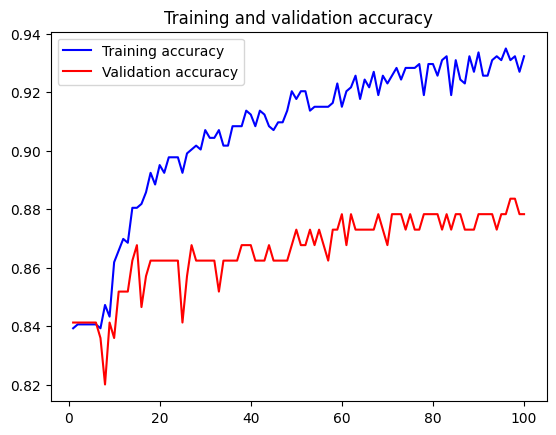

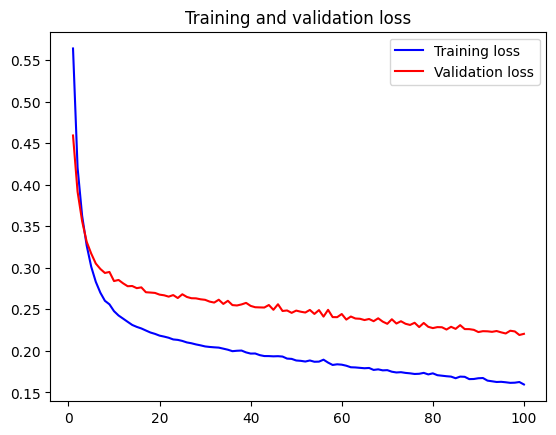

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_vgg16.predict(X_test)

6/6 [==============================] - 2s 163ms/step


Evaluation criteria for model_vgg16_combined
Label 0: Sensitivity 93.71%, Specificity 56.67%
Label 1: Sensitivity nan%, Specificity 100.00%
Label 2: Sensitivity 56.67%, Specificity 93.71%
Confusion Matrix for Label 0:
 [[ 17  13]
 [ 10 149]]


<ipython-input-55-e1707de30acc>:17: RuntimeWarning: invalid value encountered in divide
  sensitivity = TP / (TP + FN) * 100


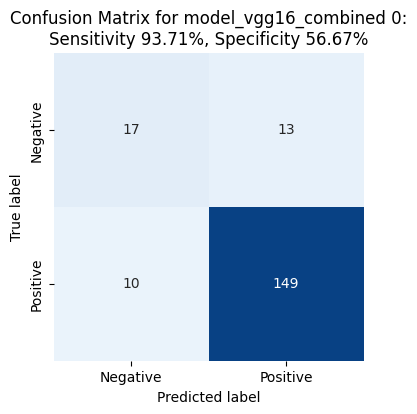

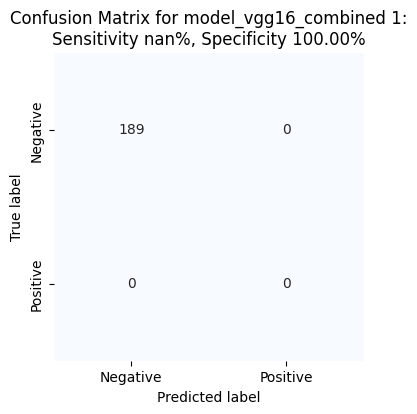

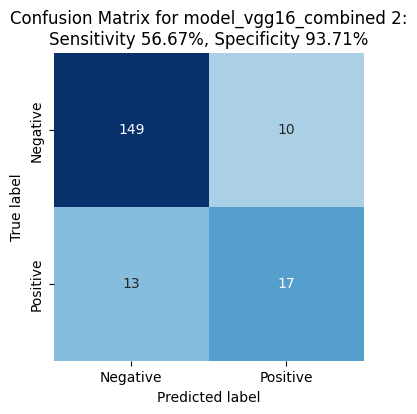

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for model_vgg16_combined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for model_vgg16_combined {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


6/6 [==============================] - 1s 163ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


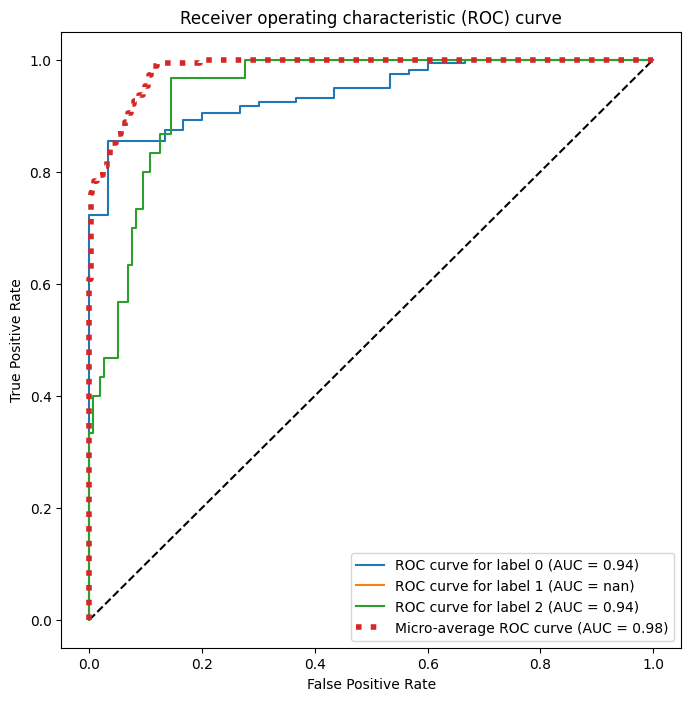

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_vgg16.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


**Inception V3- moltimudal**

In [ ]:
#from tensorflow.keras.applications import MobileNet
InceptionV3 =keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
for layer in InceptionV3.layers:
  layer.trainable= False

In [ ]:
InceptionV3.trainable = False

# Add the classification head
inputs = keras.Input(shape=(256, 256, 3))
x = InceptionV3(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_InceptionV3 = keras.Model(inputs, outputs)

# Compile the model
model_InceptionV3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_InceptionV3.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_13 (Dense)            (None, 3)                 6147      
                                                                 
Total params: 21808931 (83.19 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history = model_InceptionV3.fit(train_generator,
                    batch_size=32,
                    validation_data=val_generator,
                    epochs=100, verbose=1,callbacks=callbacks)

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
history = model_InceptionV3.fit(x=X_train,y=y_train,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    epochs=100, verbose=1,)#callbacks=callbacks)

Epoch 1/100
24/24 [==============================] - 13s 367ms/step - loss: 0.4164 - accuracy: 0.8340 - val_loss: 0.3192 - val_accuracy: 0.8677
Epoch 2/100
24/24 [==============================] - 3s 118ms/step - loss: 0.2354 - accuracy: 0.8805 - val_loss: 0.5177 - val_accuracy: 0.7778
Epoch 3/100
24/24 [==============================] - 3s 117ms/step - loss: 0.1963 - accuracy: 0.9110 - val_loss: 0.2695 - val_accuracy: 0.8942
Epoch 4/100
24/24 [==============================] - 3s 114ms/step - loss: 0.1756 - accuracy: 0.9163 - val_loss: 0.2591 - val_accuracy: 0.8889
Epoch 5/100
24/24 [==============================] - 3s 122ms/step - loss: 0.1538 - accuracy: 0.9309 - val_loss: 0.2676 - val_accuracy: 0.8677
Epoch 6/100
24/24 [==============================] - 3s 124ms/step - loss: 0.1384 - accuracy: 0.9469 - val_loss: 0.2353 - val_accuracy: 0.8889
Epoch 7/100
24/24 [==============================] - 3s 115ms/step - loss: 0.1340 - accuracy: 0.9416 - val_loss: 0.2609 - val_accuracy: 0.899

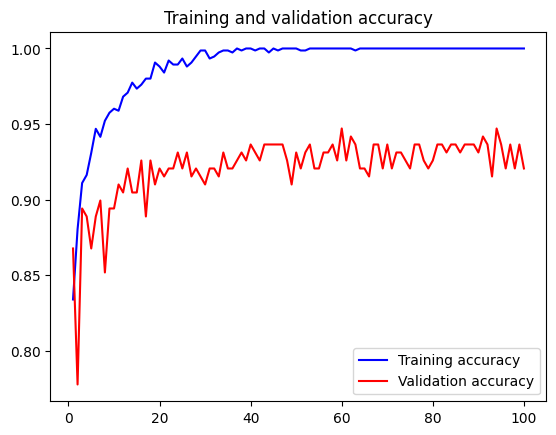

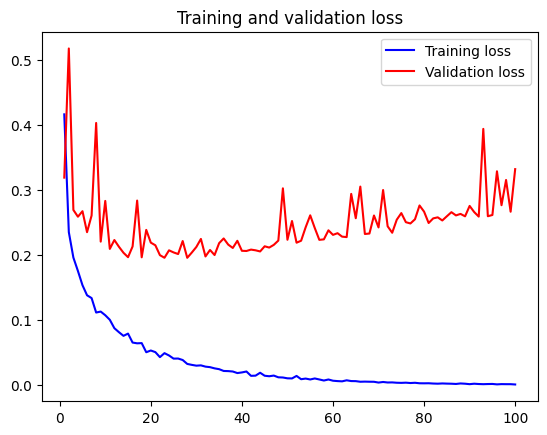

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_InceptionV3.predict(X_test)

6/6 [==============================] - 3s 109ms/step


In [ ]:
#Predict on test data
test_loss, test_acc= model_InceptionV3.evaluate(X_test, y_test, verbose=2)

6/6 - 1s - loss: 0.3322 - accuracy: 0.9206 - 757ms/epoch - 126ms/step


Evaluation criteria for model_InceptionV3_combined
Label 0: Sensitivity 92.45%, Specificity 90.00%
Label 1: Sensitivity nan%, Specificity 100.00%
Label 2: Sensitivity 90.00%, Specificity 92.45%
Confusion Matrix for Label 0:
 [[ 27   3]
 [ 12 147]]


<ipython-input-82-9e4bf3a54e15>:17: RuntimeWarning: invalid value encountered in divide
  sensitivity = TP / (TP + FN) * 100


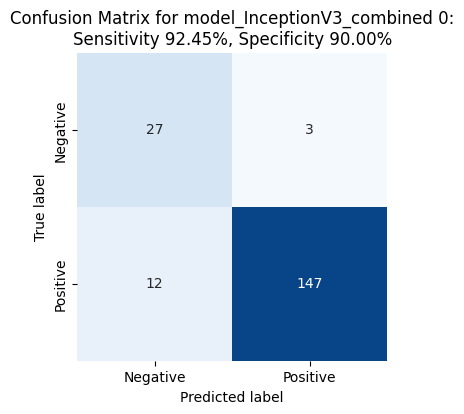

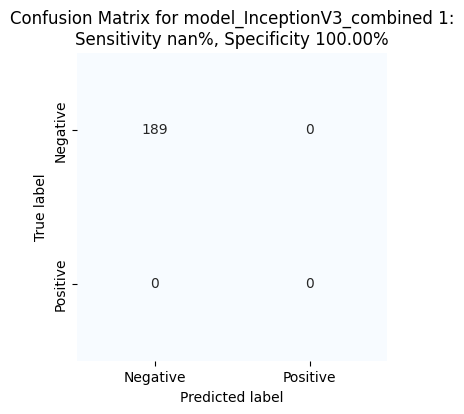

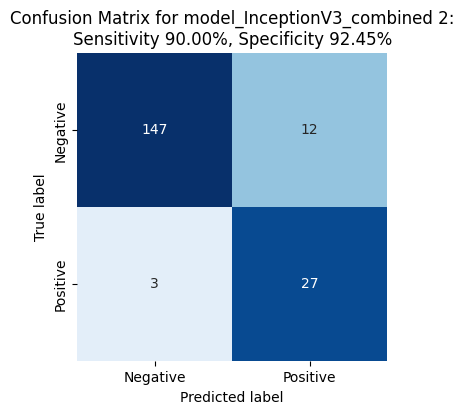

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for model_InceptionV3_combined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for model_InceptionV3_combined {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


6/6 [==============================] - 1s 101ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


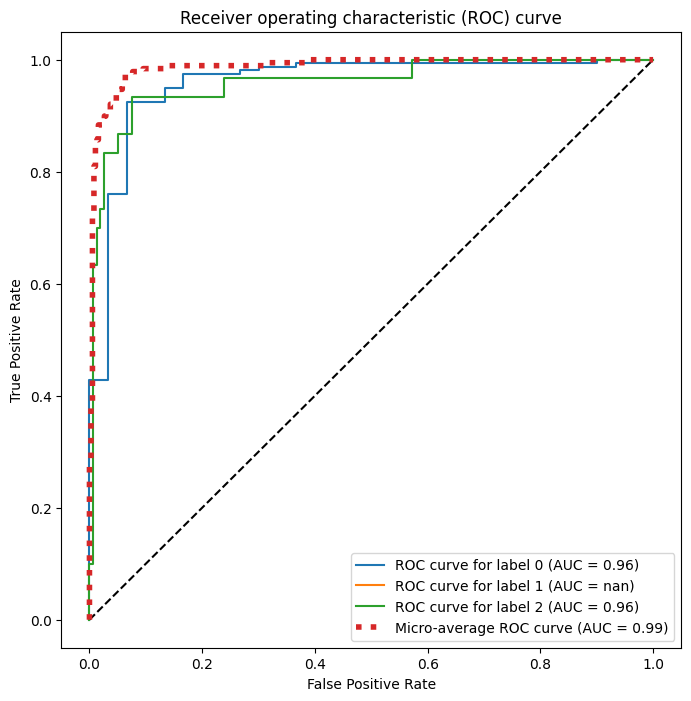

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using model_InceptionV3

# Make predictions on the testing data
y_pred_prob = model_InceptionV3.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Save the model to disk
model_InceptionV3.save("gdrive/My Drive/my_model.InceptionV3_multimodal")

**Inception V3- single modal**

Model

In [ ]:
#from tensorflow.keras.applications import MobileNet
InceptionV3_single =keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
for layer in InceptionV3_single.layers:
  layer.trainable= False

In [ ]:
InceptionV3_single.trainable = False

# Add the classification head
inputs = keras.Input(shape=(224, 224, 3))
x = InceptionV3_single(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_InceptionV3_single = keras.Model(inputs, outputs)

# Compile the model
model_InceptionV3_single.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_InceptionV3_single.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_8  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_16 (Dense)            (None, 3)                 6147      
                                                                 
Total params: 21808931 (83.19 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history = model_InceptionV3_single.fit(x=X_train,y=y_train,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    epochs=100, verbose=1,)#callbacks=callbacks)

Epoch 1/100
36/36 [==============================] - 16s 319ms/step - loss: 9.7658 - accuracy: 0.5362 - val_loss: 7.6140 - val_accuracy: 0.6962
Epoch 2/100
36/36 [==============================] - 3s 76ms/step - loss: 7.9574 - accuracy: 0.5335 - val_loss: 6.5921 - val_accuracy: 0.6962
Epoch 3/100
36/36 [==============================] - 3s 79ms/step - loss: 6.4276 - accuracy: 0.5723 - val_loss: 5.9598 - val_accuracy: 0.3924
Epoch 4/100
36/36 [==============================] - 3s 77ms/step - loss: 6.7016 - accuracy: 0.5785 - val_loss: 8.9110 - val_accuracy: 0.6962
Epoch 5/100
36/36 [==============================] - 3s 85ms/step - loss: 6.2420 - accuracy: 0.5935 - val_loss: 11.5561 - val_accuracy: 0.6962
Epoch 6/100
36/36 [==============================] - 3s 76ms/step - loss: 6.9502 - accuracy: 0.5758 - val_loss: 10.9572 - val_accuracy: 0.6962
Epoch 7/100
36/36 [==============================] - 3s 86ms/step - loss: 6.6927 - accuracy: 0.5653 - val_loss: 6.5979 - val_accuracy: 0.7025
Ep

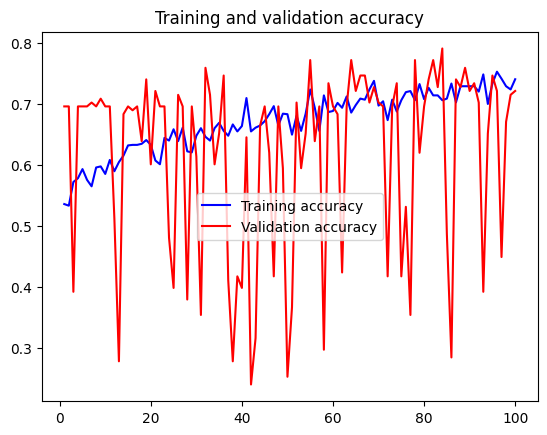

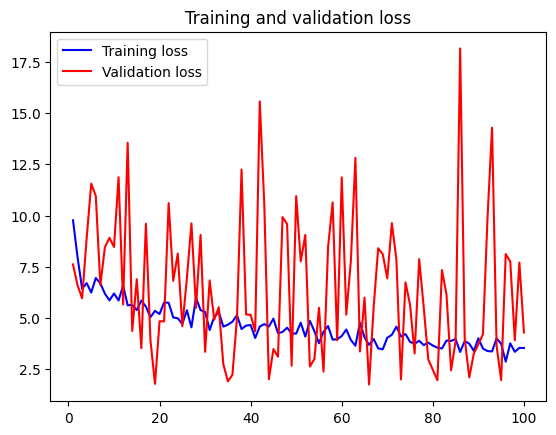

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_InceptionV3_single.predict(X_test)

5/5 [==============================] - 2s 77ms/step


In [ ]:
#Predict on test data
test_loss, test_acc= model_InceptionV3_single.evaluate(X_test, y_test, verbose=2)

5/5 - 0s - loss: 4.2897 - accuracy: 0.7215 - 411ms/epoch - 82ms/step


Evaluation criteria for model_InceptionV3_single_combined
Label 0: Sensitivity 33.33%, Specificity 93.60%
Label 1: Sensitivity 92.73%, Specificity 25.00%
Label 2: Sensitivity 6.67%, Specificity 100.00%
Confusion Matrix for Label 0:
 [[117   8]
 [ 22  11]]


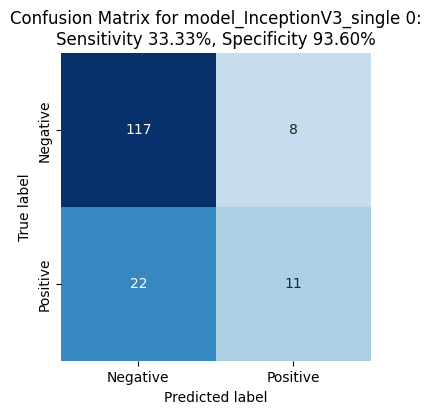

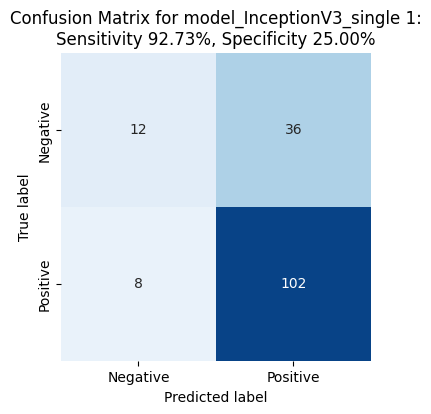

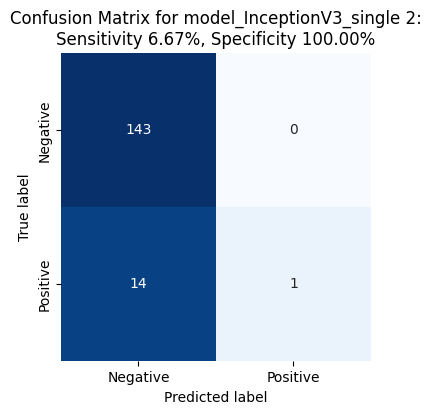

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for model_InceptionV3_single_combined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for model_InceptionV3_single {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


5/5 [==============================] - 0s 78ms/step


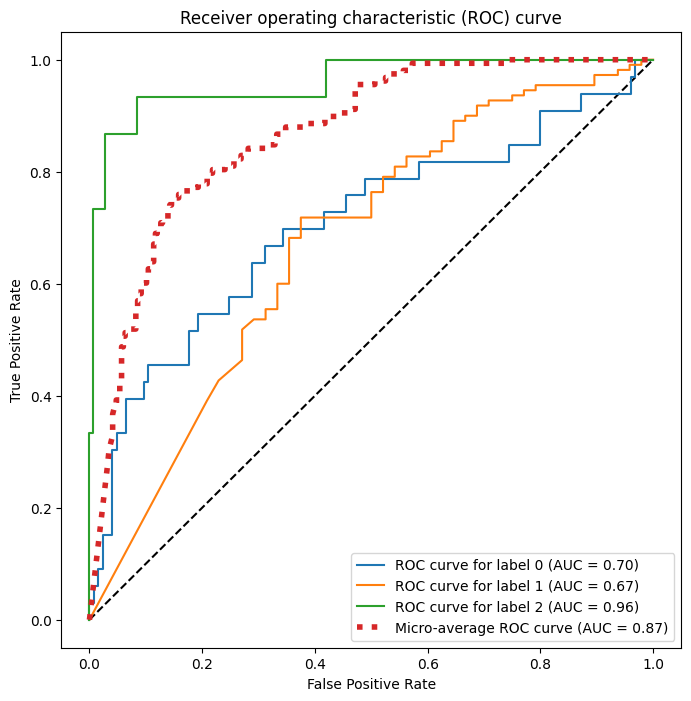

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using model_InceptionV3

# Make predictions on the testing data
y_pred_prob = model_InceptionV3_single.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Save the model to disk
model_InceptionV3_single.save("gdrive/My Drive/my_model.InceptionV3_single")

**DensNet-Single**

In [ ]:
#from tensorflow.keras.applications import MobileNet
DenseNet169_single =keras.applications.DenseNet169(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
for layer in DenseNet169_single.layers:
  layer.trainable= False

In [ ]:
DenseNet169_single.trainable = False

# Add the classification head
inputs = keras.Input(shape=(224, 224, 3))
x = DenseNet169_Multi(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_DenseNet169_single = keras.Model(inputs, outputs)

# Compile the model
modelDenseNet169_single.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_DenseNet169_single.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 global_average_pooling2d_1  (None, 1664)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_18 (Dense)            (None, 3)                 4995      
                                                                 
Total params: 12647875 (48.25 MB)
Trainable params: 4995 (19.51 KB)
Non-trainable params: 12642880 (48.23 MB)
_________________________________________________________________


In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history = model_DenseNet169_single.fit(x=X_train,y=y_train,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    epochs=100, verbose=1,)#callbacks=callbacks)

Epoch 1/100
36/36 [==============================] - 34s 490ms/step - loss: 1.5813 - accuracy: 0.5996 - val_loss: 1.8141 - val_accuracy: 0.6772
Epoch 2/100
36/36 [==============================] - 5s 127ms/step - loss: 1.1978 - accuracy: 0.6332 - val_loss: 1.6588 - val_accuracy: 0.6962
Epoch 3/100
36/36 [==============================] - 5s 131ms/step - loss: 1.0724 - accuracy: 0.6332 - val_loss: 1.2166 - val_accuracy: 0.7025
Epoch 4/100
36/36 [==============================] - 5s 133ms/step - loss: 1.1932 - accuracy: 0.6199 - val_loss: 1.9941 - val_accuracy: 0.2911
Epoch 5/100
36/36 [==============================] - 5s 129ms/step - loss: 1.0431 - accuracy: 0.6376 - val_loss: 1.0151 - val_accuracy: 0.5443
Epoch 6/100
36/36 [==============================] - 5s 129ms/step - loss: 1.0425 - accuracy: 0.6570 - val_loss: 2.9398 - val_accuracy: 0.2405
Epoch 7/100
36/36 [==============================] - 5s 135ms/step - loss: 1.0114 - accuracy: 0.6843 - val_loss: 0.8534 - val_accuracy: 0.613

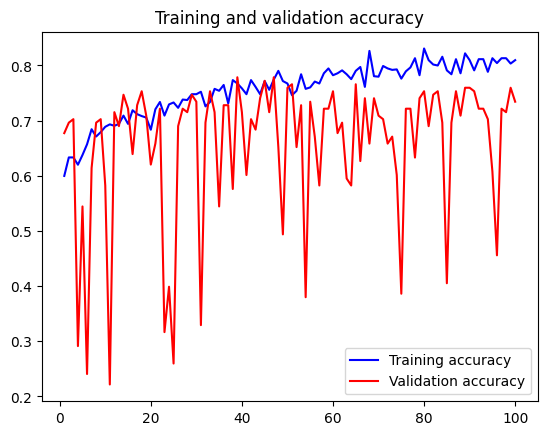

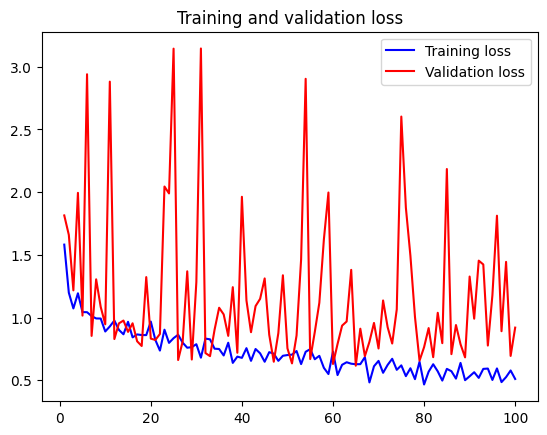

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_DenseNet169_single.predict(X_test)

5/5 [==============================] - 3s 120ms/step


In [ ]:
#Predict on test data
test_loss, test_acc= model_DenseNet169_single.evaluate(X_test, y_test, verbose=2)

5/5 - 1s - loss: 0.9195 - accuracy: 0.7342 - 541ms/epoch - 108ms/step


Evaluation criteria for model_DenseNet169_single
Label 0: Sensitivity 15.15%, Specificity 96.80%
Label 1: Sensitivity 95.45%, Specificity 25.00%
Label 2: Sensitivity 33.33%, Specificity 100.00%
Confusion Matrix for Label 0:
 [[121   4]
 [ 28   5]]


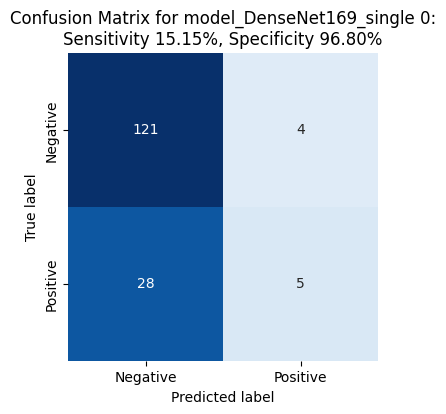

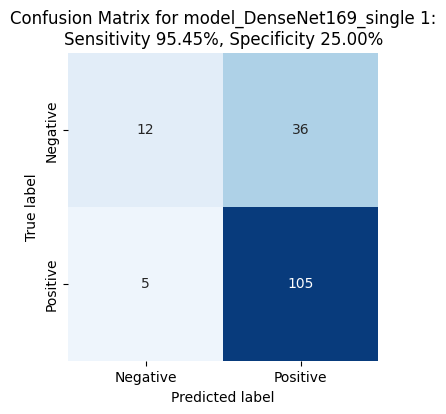

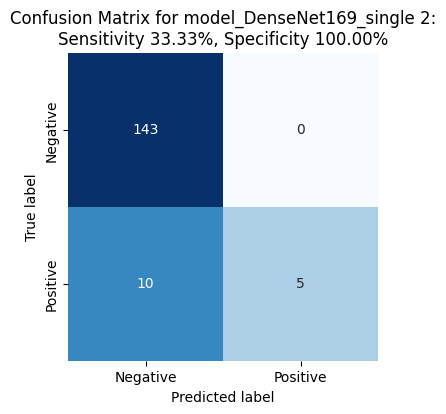

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for model_DenseNet169_single")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for model_DenseNet169_single {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


5/5 [==============================] - 0s 101ms/step


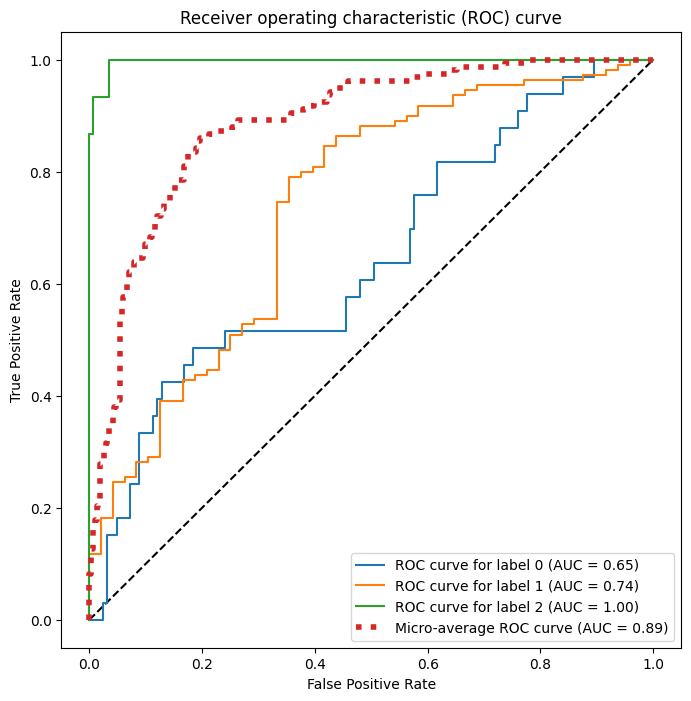

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using model_InceptionV3

# Make predictions on the testing data
y_pred_prob = model_DenseNet169_single.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Save the model to disk
model_DenseNet169_single.save("gdrive/My Drive/my_model.DenseNet169_single")

**DensNet-Multi**

In [ ]:
#from tensorflow.keras.applications import MobileNet
DenseNet169_Multi =keras.applications.DenseNet169(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
for layer in DenseNet169_Multi.layers:
  layer.trainable= False

51877672/51877672 [==============================] - 3s 0us/step


In [ ]:
DenseNet169_Multi.trainable = False

# Add the classification head
inputs = keras.Input(shape=(256, 256, 3))
x = DenseNet169_Multi(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_DenseNet169_Multi = keras.Model(inputs, outputs)

# Compile the model
model_DenseNet169_Multi.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_DenseNet169_Multi.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 densenet169 (Functional)    (None, 8, 8, 1664)        12642880  
                                                                 
 global_average_pooling2d (  (None, 1664)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 3)                 4995      
                                                                 
Total params: 12647875 (48.25 MB)
Trainable params: 4995 (19.51 KB)
Non-trainable params: 12642880 (48.23 MB)
_________________________________________________________________


In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history = model_DenseNet169_Multi.fit(x=X_train,y=y_train,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    epochs=100, verbose=1,)#callbacks=callbacks)

Epoch 1/100
24/24 [==============================] - 43s 964ms/step - loss: 0.3928 - accuracy: 0.8074 - val_loss: 0.2734 - val_accuracy: 0.8466
Epoch 2/100
24/24 [==============================] - 5s 202ms/step - loss: 0.2349 - accuracy: 0.8712 - val_loss: 0.2329 - val_accuracy: 0.8624
Epoch 3/100
24/24 [==============================] - 4s 171ms/step - loss: 0.1948 - accuracy: 0.9044 - val_loss: 0.2290 - val_accuracy: 0.8624
Epoch 4/100
24/24 [==============================] - 5s 192ms/step - loss: 0.1886 - accuracy: 0.9057 - val_loss: 0.2175 - val_accuracy: 0.8783
Epoch 5/100
24/24 [==============================] - 4s 180ms/step - loss: 0.1615 - accuracy: 0.9190 - val_loss: 0.2001 - val_accuracy: 0.8995
Epoch 6/100
24/24 [==============================] - 4s 178ms/step - loss: 0.1553 - accuracy: 0.9296 - val_loss: 0.2091 - val_accuracy: 0.8889
Epoch 7/100
24/24 [==============================] - 5s 193ms/step - loss: 0.1408 - accuracy: 0.9336 - val_loss: 0.1845 - val_accuracy: 0.910

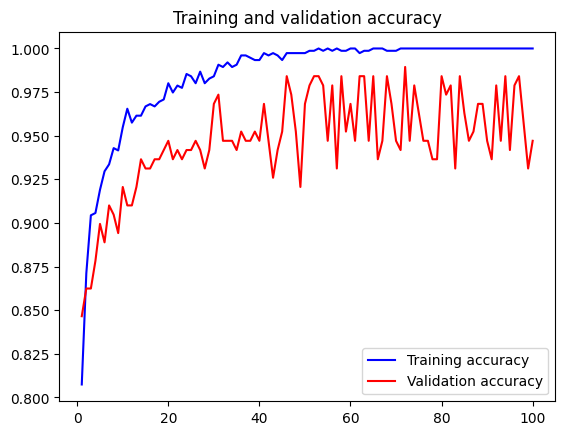

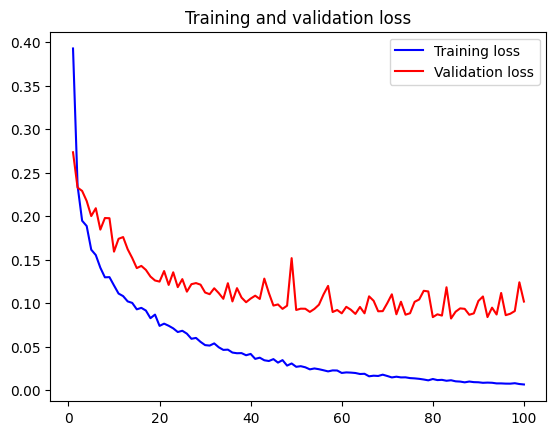

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_DenseNet169_Multi.predict(X_test)

6/6 [==============================] - 1s 143ms/step


In [ ]:
#Predict on test data
test_loss, test_acc= model_DenseNet169_Multi.evaluate(X_test, y_test, verbose=2)

6/6 - 1s - loss: 0.1018 - accuracy: 0.9471 - 809ms/epoch - 135ms/step


Evaluation criteria for model_model_DenseNet169_Multi
Label 0: Sensitivity 94.97%, Specificity 93.33%
Label 1: Sensitivity nan%, Specificity 100.00%
Label 2: Sensitivity 93.33%, Specificity 94.97%
Confusion Matrix for Label 0:
 [[ 28   2]
 [  8 151]]


<ipython-input-55-ee634ac9871e>:17: RuntimeWarning: invalid value encountered in divide
  sensitivity = TP / (TP + FN) * 100


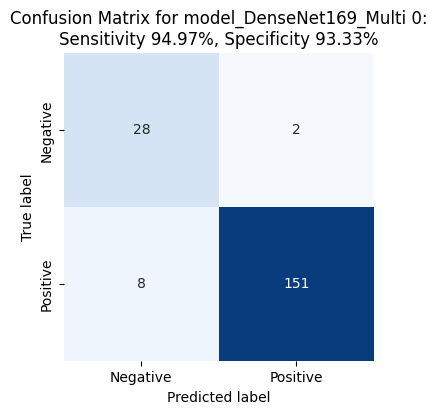

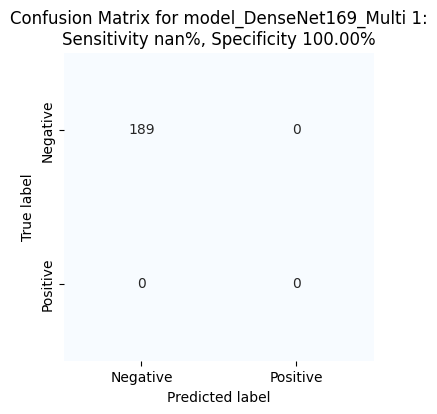

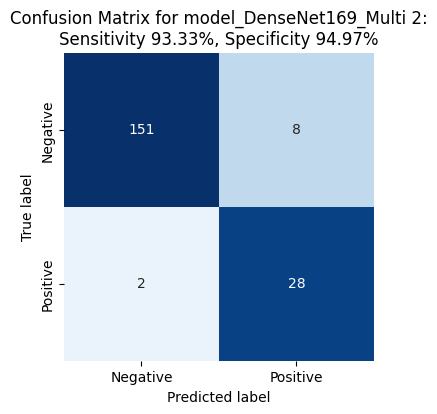

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for model_model_DenseNet169_Multi")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for model_DenseNet169_Multi {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


6/6 [==============================] - 1s 126ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


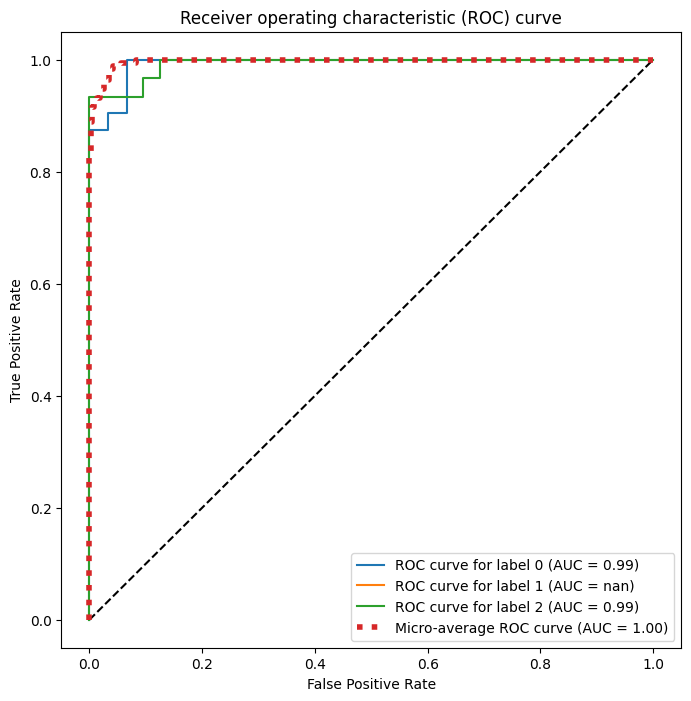

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using model_InceptionV3

# Make predictions on the testing data
y_pred_prob = model_DenseNet169_Multi.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Save the model to disk
model_DenseNet169_Multi.save("gdrive/My Drive/my_model.DenseNet169_Multi")

**Efficient-Multi**

In [ ]:
#from tensorflow.keras.applications import MobileNet
EfficientNetB6_Multi =keras.applications.EfficientNetB6(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
for layer in EfficientNetB6_Multi.layers:
  layer.trainable= False

165234480/165234480 [==============================] - 9s 0us/step


In [ ]:
EfficientNetB6_Multi.trainable = False

# Add the classification head
inputs = keras.Input(shape=(256, 256, 3))
x = EfficientNetB6_Multi(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_EfficientNetB6_Multi = keras.Model(inputs, outputs)

# Compile the model
model_EfficientNetB6_Multi.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_EfficientNetB6_Multi.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 efficientnetb6 (Functional  (None, 8, 8, 2304)        40960143  
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 2304)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 3)                 6915      
                                                                 
Total params: 40967058 (156.28 MB)
Trainable params: 6915 (27.01 KB)
Non-trainable params: 40960143 (156.25 MB)
_________________________________________________________________


In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history = model_EfficientNetB6_Multi.fit(x=X_train,y=y_train,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    epochs=100, verbose=1,)#callbacks=callbacks)

Epoch 1/100
24/24 [==============================] - 54s 1s/step - loss: 0.5121 - accuracy: 0.8008 - val_loss: 0.4377 - val_accuracy: 0.8413
Epoch 2/100
24/24 [==============================] - 11s 460ms/step - loss: 0.3902 - accuracy: 0.8406 - val_loss: 0.3874 - val_accuracy: 0.8413
Epoch 3/100
24/24 [==============================] - 11s 457ms/step - loss: 0.3557 - accuracy: 0.8406 - val_loss: 0.3942 - val_accuracy: 0.8413
Epoch 4/100
24/24 [==============================] - 10s 415ms/step - loss: 0.3462 - accuracy: 0.8406 - val_loss: 0.3851 - val_accuracy: 0.8413
Epoch 5/100
24/24 [==============================] - 10s 400ms/step - loss: 0.3414 - accuracy: 0.8406 - val_loss: 0.3787 - val_accuracy: 0.8413
Epoch 6/100
24/24 [==============================] - 10s 403ms/step - loss: 0.3355 - accuracy: 0.8393 - val_loss: 0.4171 - val_accuracy: 0.7407
Epoch 7/100
24/24 [==============================] - 10s 428ms/step - loss: 0.3357 - accuracy: 0.8433 - val_loss: 0.3979 - val_accuracy: 0.

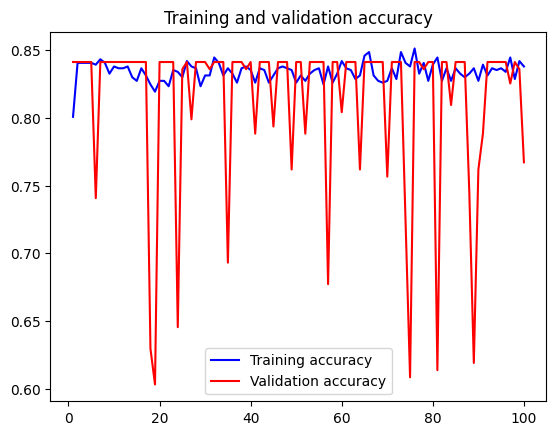

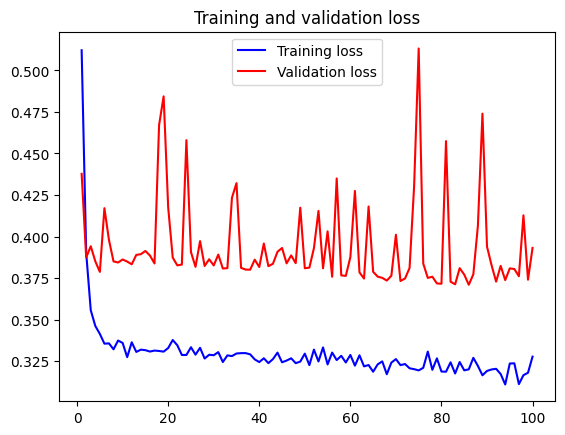

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_EfficientNetB6_Multi.predict(X_test)

6/6 [==============================] - 8s 323ms/step


In [ ]:
#Predict on test data
test_loss, test_acc= model_EfficientNetB6_Multi.evaluate(X_test, y_test, verbose=2)

6/6 - 2s - loss: 0.3931 - accuracy: 0.7672 - 2s/epoch - 312ms/step


Evaluation criteria for model_EfficientNetB6_Multi
Label 0: Sensitivity 86.16%, Specificity 26.67%
Label 1: Sensitivity nan%, Specificity 100.00%
Label 2: Sensitivity 26.67%, Specificity 86.16%
Confusion Matrix for Label 0:
 [[  8  22]
 [ 22 137]]


<ipython-input-67-55003b66b2e4>:17: RuntimeWarning: invalid value encountered in divide
  sensitivity = TP / (TP + FN) * 100


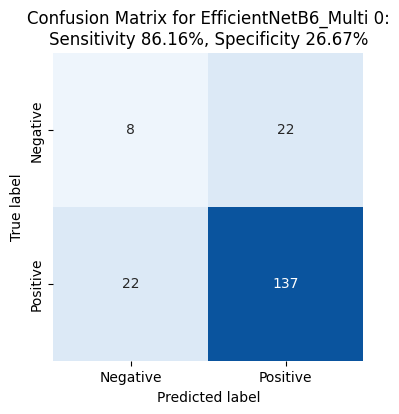

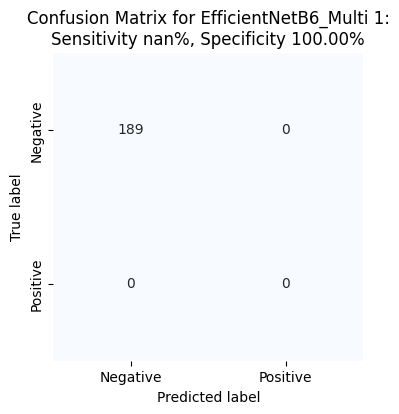

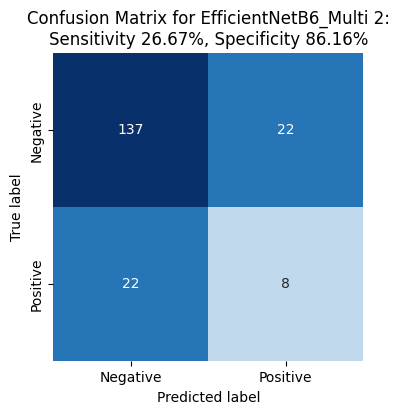

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for model_EfficientNetB6_Multi")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for EfficientNetB6_Multi {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


6/6 [==============================] - 2s 309ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


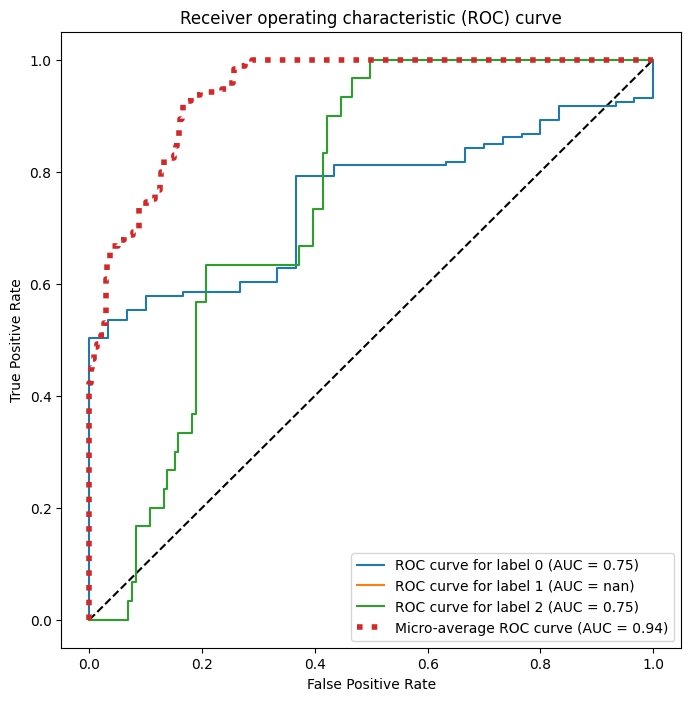

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using model_InceptionV3

# Make predictions on the testing data
y_pred_prob = model_EfficientNetB6_Multi.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Save the model to disk
model_EfficientNetB6_Multi.save("gdrive/My Drive/my_model.EfficientNetB6_Multi")

**Efficient-Single**

In [ ]:
#from tensorflow.keras.applications import MobileNet
Efficient_Single =keras.applications.EfficientNetB6(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
for layer in Efficient_Single.layers:
  layer.trainable= False

In [ ]:
Efficient_Single.trainable = False

# Add the classification head
inputs = keras.Input(shape=(224, 224, 3))
x = Efficient_Single(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_Efficient_Single = keras.Model(inputs, outputs)

# Compile the model
model_Efficient_Single.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_Efficient_Single.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb6 (Functional  (None, 7, 7, 2304)        40960143  
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 2304)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 3)                 6915      
                                                                 
Total params: 40967058 (156.28 MB)
Trainable params: 6915 (27.01 KB)
Non-trainable params: 40960143 (156.25 MB)
_________________________________________________________________


In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
history = model_Efficient_Single.fit(x=X_s_train,y=y_s_train,
                    batch_size=32,
                    validation_data=(X_s_test, y_s_test),
                    epochs=100, verbose=1,)#callbacks=callbacks)

Epoch 1/100
36/36 [==============================] - 43s 600ms/step - loss: 0.7662 - accuracy: 0.6931 - val_loss: 0.7230 - val_accuracy: 0.7152
Epoch 2/100
36/36 [==============================] - 10s 288ms/step - loss: 0.6909 - accuracy: 0.7231 - val_loss: 0.6812 - val_accuracy: 0.7152
Epoch 3/100
36/36 [==============================] - 10s 287ms/step - loss: 0.6595 - accuracy: 0.7381 - val_loss: 0.7249 - val_accuracy: 0.6899
Epoch 4/100
36/36 [==============================] - 10s 290ms/step - loss: 0.6420 - accuracy: 0.7372 - val_loss: 0.6482 - val_accuracy: 0.6962
Epoch 5/100
36/36 [==============================] - 10s 288ms/step - loss: 0.6148 - accuracy: 0.7522 - val_loss: 0.6478 - val_accuracy: 0.7152
Epoch 6/100
36/36 [==============================] - 10s 289ms/step - loss: 0.6001 - accuracy: 0.7434 - val_loss: 0.6796 - val_accuracy: 0.6899
Epoch 7/100
36/36 [==============================] - 10s 284ms/step - loss: 0.5895 - accuracy: 0.7557 - val_loss: 0.6517 - val_accuracy:

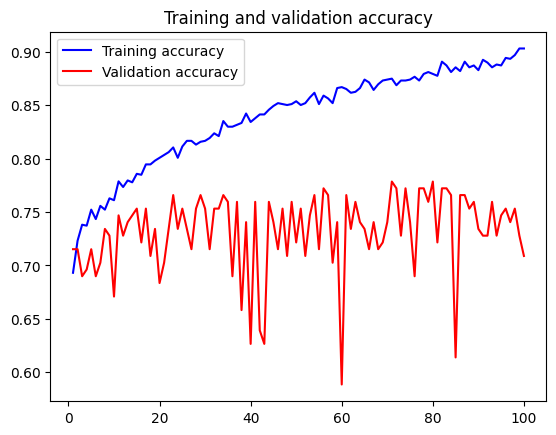

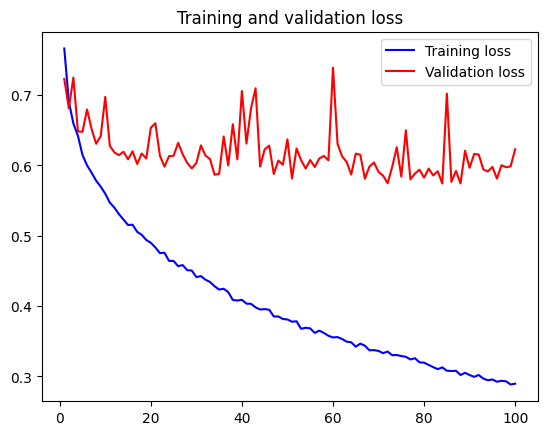

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_Efficient_Single.predict(X_s_test)

5/5 [==============================] - 5s 252ms/step


In [ ]:
#Predict on test data
test_loss, test_acc= model_Efficient_Single.evaluate(X_s_test, y_s_test, verbose=2)

5/5 - 1s - loss: 0.6230 - accuracy: 0.7089 - 1s/epoch - 265ms/step


Evaluation criteria for model_Efficient_Single
Label 0: Sensitivity 48.48%, Specificity 84.80%
Label 1: Sensitivity 75.45%, Specificity 62.50%
Label 2: Sensitivity 53.33%, Specificity 98.60%
Confusion Matrix for Label 0:
 [[106  19]
 [ 17  16]]


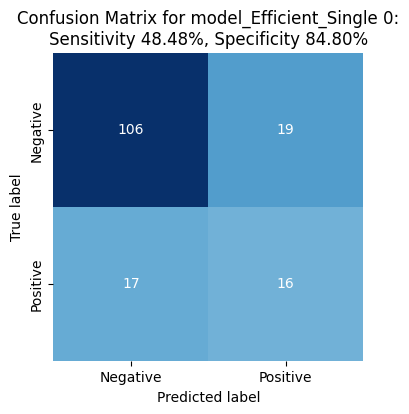

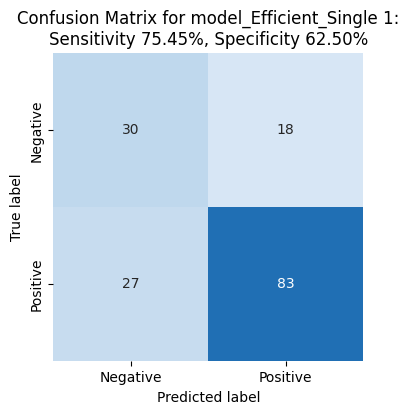

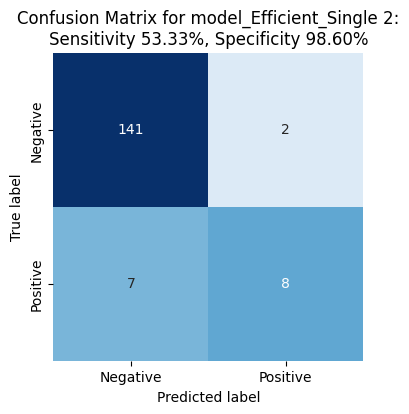

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for model_Efficient_Single")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_s_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_s_test[:, i].sum())
    plt.title("Confusion Matrix for model_Efficient_Single {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


5/5 [==============================] - 1s 252ms/step


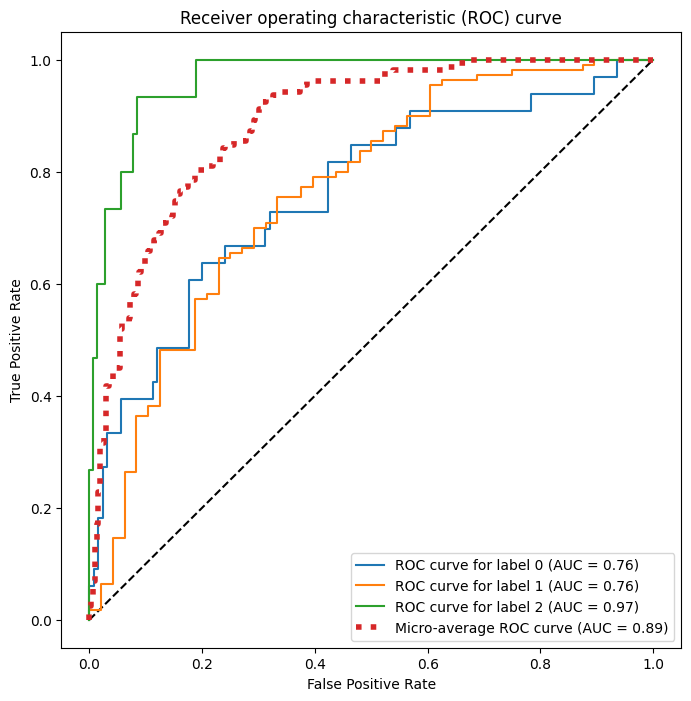

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using model_Efficient_Single

# Make predictions on the testing data
y_pred_prob = model_Efficient_Single.predict(X_s_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_s_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_s_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_s_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_s_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Save the model to disk
model_Efficient_Single.save("gdrive/My Drive/my_model.Efficient_Single")

# NIHSS

# preprocessing

In [ ]:
import rarfile
with rarfile.RarFile('/content/drive/MyDrive/Stroke Detection/main data-stroke images/tracew/resnet-all-just Only slices containing strokes.rar', 'r') as archive:
    archive.extractall('/content/drive/MyDrive/Stroke Detection/Untitled Folder')

In [ ]:
# Set the path to dcm DWI image folder
dwi_dir_nihss = "/content/drive/MyDrive/Untitled folder/Stroke Detection/Untitled Folder/new"
dwi_dir_nihss_csv ='/content/drive/MyDrive/Untitled folder/Stroke Detection/main data-stroke images/tracew/balanced data-for resnet-just entry nihss.csv'

In [ ]:
# Load the DWIlabels from the CSV file into a pandas DataFrame
dwinihss_labels_df = pd.read_csv(dwi_dir_nihss_csv)

In [ ]:
dwinihss_labels_df

ID  entry NIHSS range
0      2 (1)    (NIHSS= 1 to 4)
1      2 (2)    (NIHSS= 1 to 4)
2      2 (3)    (NIHSS= 1 to 4)
3      2 (4)    (NIHSS= 1 to 4)
4      2 (5)    (NIHSS= 1 to 4)
..       ...                ...
699  126 (2)   (NIHSS= 5 to 15)
700  127 (1)   (NIHSS= 5 to 15)
701  127 (2)   (NIHSS= 5 to 15)
702  128 (1)   (NIHSS= 5 to 15)
703  128 (2)   (NIHSS= 5 to 15)

[704 rows x 2 columns]

In [ ]:
dwinihss_labels_df = dwinihss_labels_df.rename(columns={'entry NIHSS range': 'label'})

In [ ]:
dwinihss_labels_df

ID              label
0      2 (1)    (NIHSS= 1 to 4)
1      2 (2)    (NIHSS= 1 to 4)
2      2 (3)    (NIHSS= 1 to 4)
3      2 (4)    (NIHSS= 1 to 4)
4      2 (5)    (NIHSS= 1 to 4)
..       ...                ...
699  126 (2)   (NIHSS= 5 to 15)
700  127 (1)   (NIHSS= 5 to 15)
701  127 (2)   (NIHSS= 5 to 15)
702  128 (1)   (NIHSS= 5 to 15)
703  128 (2)   (NIHSS= 5 to 15)

[704 rows x 2 columns]

In [ ]:
mask = dwinihss_labels_df.isna().any(axis=1)
num_missing_rows = mask.sum()

print("Number of rows with missing values:", num_missing_rows)

Number of rows with missing values: 0


In [ ]:
dwi_ext='.dcm'

(256, 256, 3)


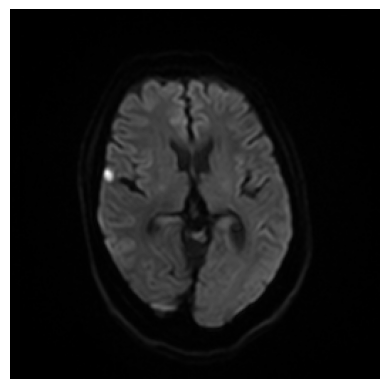

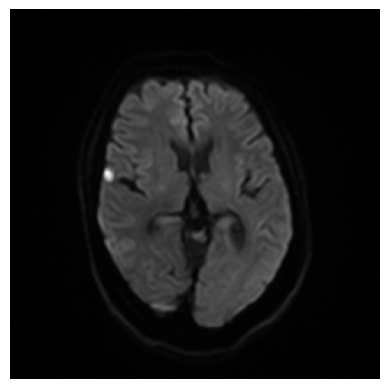

(256, 256, 3)

In [ ]:
# read in DICOM files
import numpy as np
from PIL import Image

bb = '/content/drive/MyDrive/Stroke Detection/Untitled Folder/new/111 (2).dcm'
nr = pydicom.read_file(bb).pixel_array
norm = cv2.resize(nr, (256, 256))
# combine ADC and DWI into a single 3D array
combined = np.stack([norm, norm], axis=-1)
gray = np.min(combined, axis=-1)
X = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
# convert to grayscale
print(X.shape)
image =  cv2.normalize(src=X, dst=X, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

#print(image_normal.shape)
# Convert to PIL Image and save as PNG
plt.imshow(nr,cmap='gray')
plt.axis('off')
plt.show()

# display grayscale image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
image.shape

In [ ]:
adc_ext=".dcm"

In [ ]:
def load_images_NIHSS(filename):
    # Load image
    img_file = os.path.join(dwi_dir_nihss, filename + adc_ext)
    img_dcm = pydicom.dcmread(img_file)
    img_image = img_dcm.pixel_array
    img_image = cv2.resize(img_image, (256, 256))

    image = np.stack([img_image, img_image], axis=-1)
    gray = np.min(image, axis=-1)
    X = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    image =  cv2.normalize(src=X, dst=X, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

    return image

In [ ]:
# Load the images and labels into numpy arrays
X = []
y = []
for filename, label in zip(dwinihss_labels_df['ID'], dwinihss_labels_df['label']):
    image = load_images_NIHSS(filename)
    if image is not None:

        X.append(image)

        if 'NIHSS= 1 to 4' in str(label):
             y.append(0)
        elif 'NIHSS= 5 to 15' in str(label):
             y.append(1)
        elif 'NIHSS= 16 to 20' in str(label):
             y.append(2)

# Convert the lists to numpy arrays
X = np.stack(X)
y = np.array(y)

In [ ]:
len_x= len(X)
len_y= len(y)
print("len_y:",len_y,"len_x:",len_x)

len_y: 704 len_x: 704


In [ ]:
y= to_categorical(y,num_classes=3)
#print(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.RandomBrightness(0.3),
        layers.RandomContrast(0.2),
        #layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        #layers.RandomRotation(factor=0.2),
        #layers.GaussianNoise(stddev=0.01)
    ]
)

In [ ]:
# Create an image data generator object to apply data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=data_augmentation,
    validation_split=0.2
)

# Create the training data generator
train_generator = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
    shuffle=True,
    subset='training'
)

# Create the validation data generator
val_generator = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
    shuffle=True,
    subset='validation'
)


**ACL- MobileNetV1**

In [ ]:
from tensorflow.keras.applications import MobileNet
MobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in MobileNet.layers:
  layer.trainable= False

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_MobileNet = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = keras.applications.mobilenet.preprocess_input(x)
x = keras.applications.MobileNet(include_top=False, input_shape=(256, 256, 3))(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_MobileNet = keras.Model(inputs, outputs)
model_MobileNet.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])


In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [ ]:
model_MobileNet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 256, 256, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                           

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:
# Train the model
history = model_MobileNet.fit(
    x=X_train,y=y_train,
    epochs=150,
    validation_data=(X_test, y_test),
)

Epoch 1/100
18/18 [==============================] - 6s 200ms/step - loss: 6.6893 - accuracy: 0.3961 - val_loss: 1.0830 - val_accuracy: 0.5390
Epoch 2/100
18/18 [==============================] - 1s 79ms/step - loss: 1.0660 - accuracy: 0.4476 - val_loss: 1.0386 - val_accuracy: 0.4397
Epoch 3/100
18/18 [==============================] - 1s 76ms/step - loss: 0.9627 - accuracy: 0.5506 - val_loss: 1.0131 - val_accuracy: 0.5461
Epoch 4/100
18/18 [==============================] - 1s 77ms/step - loss: 0.9686 - accuracy: 0.5684 - val_loss: 0.8818 - val_accuracy: 0.5745
Epoch 5/100
18/18 [==============================] - 1s 79ms/step - loss: 0.7756 - accuracy: 0.6519 - val_loss: 0.7974 - val_accuracy: 0.6738
Epoch 6/100
18/18 [==============================] - 1s 82ms/step - loss: 0.7020 - accuracy: 0.7247 - val_loss: 0.6847 - val_accuracy: 0.7234
Epoch 7/100
18/18 [==============================] - 1s 82ms/step - loss: 0.5840 - accuracy: 0.7655 - val_loss: 0.7141 - val_accuracy: 0.7021
Epoch

In [ ]:

# Train the model
history = model_MobileNet.fit(
    x=X_train,y=y_train,
    epochs=150,
    validation_data=(X_test, y_test),
)

Epoch 1/150
18/18 [==============================] - 18s 809ms/step - loss: 1.0553 - accuracy: 0.4192 - val_loss: 1.1298 - val_accuracy: 0.4196
Epoch 2/150
18/18 [==============================] - 6s 366ms/step - loss: 1.0494 - accuracy: 0.4210 - val_loss: 1.0576 - val_accuracy: 0.4554
Epoch 3/150
18/18 [==============================] - 9s 499ms/step - loss: 1.0377 - accuracy: 0.4263 - val_loss: 1.2531 - val_accuracy: 0.4018
Epoch 4/150
18/18 [==============================] - 11s 608ms/step - loss: 1.0164 - accuracy: 0.4405 - val_loss: 1.2849 - val_accuracy: 0.4107
Epoch 5/150
18/18 [==============================] - 13s 742ms/step - loss: 1.0320 - accuracy: 0.4458 - val_loss: 1.0954 - val_accuracy: 0.4107
Epoch 6/150
18/18 [==============================] - 7s 388ms/step - loss: 1.0034 - accuracy: 0.4583 - val_loss: 1.0447 - val_accuracy: 0.4732
Epoch 7/150
18/18 [==============================] - 7s 417ms/step - loss: 0.9952 - accuracy: 0.4920 - val_loss: 1.4227 - val_accuracy: 0.4

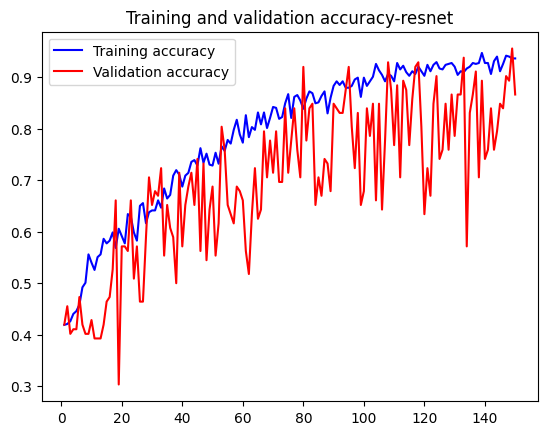

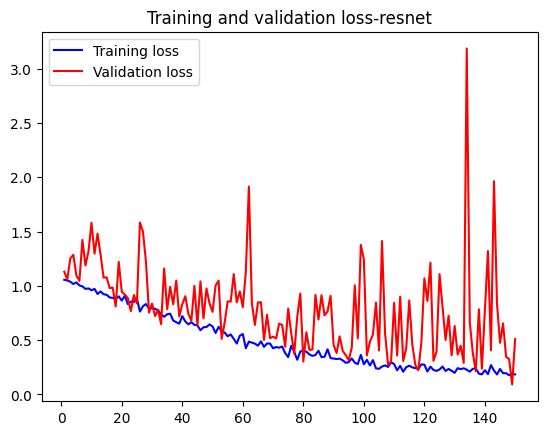

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy-resnet")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss-resnet")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_MobileNet.predict(X_test)

5/5 [==============================] - 3s 315ms/step


Evaluation criteria for Resnet-combined
Label 0: Sensitivity 48.89%, Specificity 98.96%
Label 1: Sensitivity 97.06%, Specificity 63.01%
Label 2: Sensitivity 67.86%, Specificity 94.69%
Confusion Matrix for Label 0:
 [[95  1]
 [23 22]]


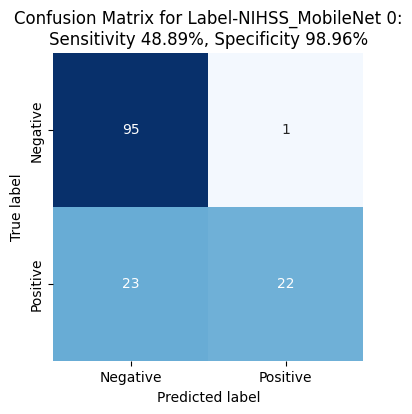

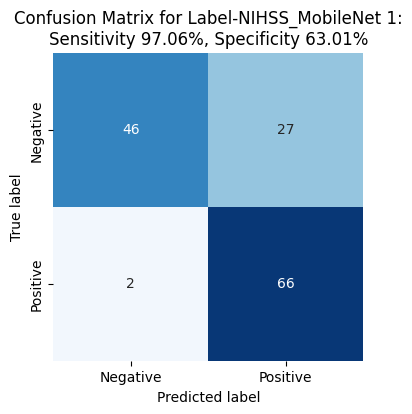

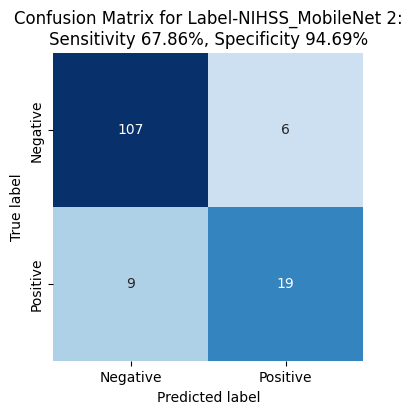

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for Resnet-combined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-NIHSS_MobileNet {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


5/5 [==============================] - 0s 54ms/step


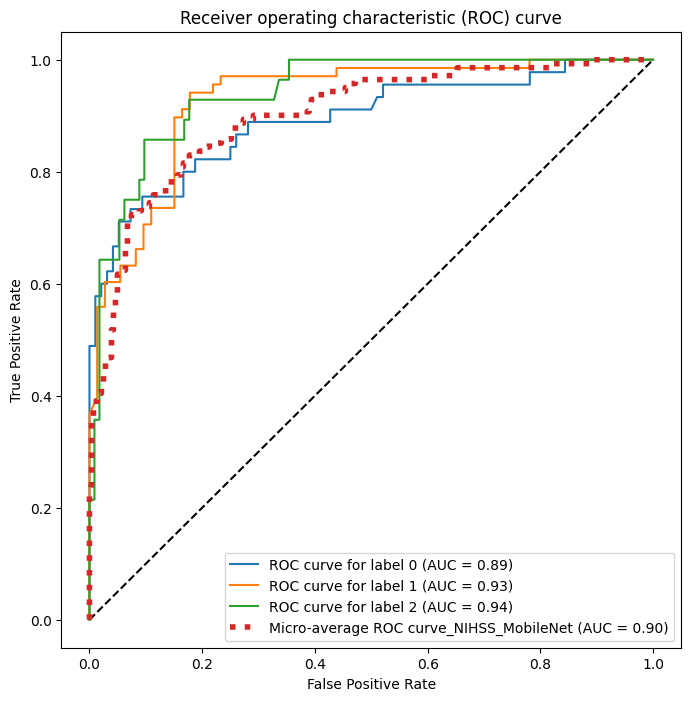

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_MobileNet.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve_NIHSS_MobileNet (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


**Mobilnet**

In [ ]:
from tensorflow.keras.applications import MobileNet
MobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in MobileNet.layers:
  layer.trainable= False

In [ ]:
# Create the ResNet model
base_model = keras.applications.MobileNet(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)

# Freeze the base model
base_model.trainable = False

# Add the classification head
inputs = keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_MobileNet = keras.Model(inputs, outputs)

# Compile the model
model_MobileNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_MobileNet.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 3,231,939
Trainable params: 3,075
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
# Train the model
history = model_MobileNet1.fit(
    x=X_train,y=y_train,
    epochs=150,
    validation_data=(X_test, y_test),
)

Epoch 1/150
16/16 [==============================] - 5s 153ms/step - loss: 1.2090 - accuracy: 0.4126 - val_loss: 1.0777 - val_accuracy: 0.4764
Epoch 2/150
16/16 [==============================] - 1s 61ms/step - loss: 1.0165 - accuracy: 0.4878 - val_loss: 1.0359 - val_accuracy: 0.4811
Epoch 3/150
16/16 [==============================] - 1s 61ms/step - loss: 0.9602 - accuracy: 0.5264 - val_loss: 0.9921 - val_accuracy: 0.4858
Epoch 4/150
16/16 [==============================] - 1s 60ms/step - loss: 0.9204 - accuracy: 0.5549 - val_loss: 1.0185 - val_accuracy: 0.4528
Epoch 5/150
16/16 [==============================] - 1s 60ms/step - loss: 0.8921 - accuracy: 0.5813 - val_loss: 0.9821 - val_accuracy: 0.4858
Epoch 6/150
16/16 [==============================] - 1s 57ms/step - loss: 0.8627 - accuracy: 0.5813 - val_loss: 0.9790 - val_accuracy: 0.4764
Epoch 7/150
16/16 [==============================] - 1s 58ms/step - loss: 0.8245 - accuracy: 0.6301 - val_loss: 0.9492 - val_accuracy: 0.5849
Epoch

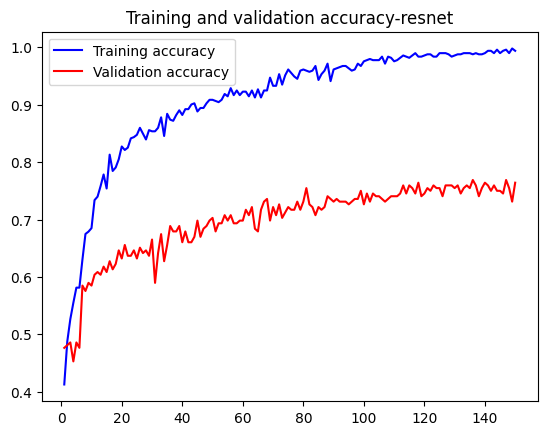

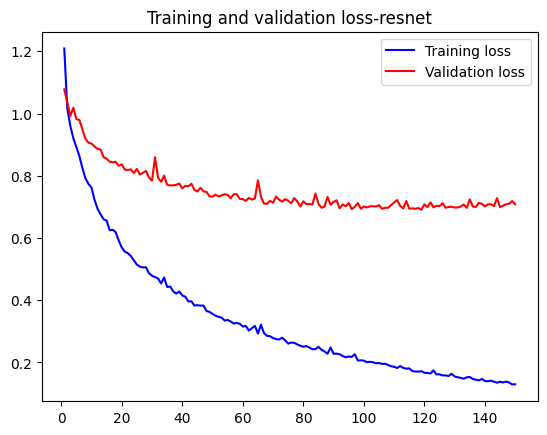

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy-resnet")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss-resnet")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_MobileNet1.predict(X_test)

7/7 [==============================] - 1s 47ms/step


Evaluation criteria for Resnet-combined
Label 0: Sensitivity 62.32%, Specificity 90.21%
Label 1: Sensitivity 76.53%, Specificity 84.21%
Label 2: Sensitivity 75.56%, Specificity 93.41%
Confusion Matrix for Label 0:
 [[129  14]
 [ 26  43]]


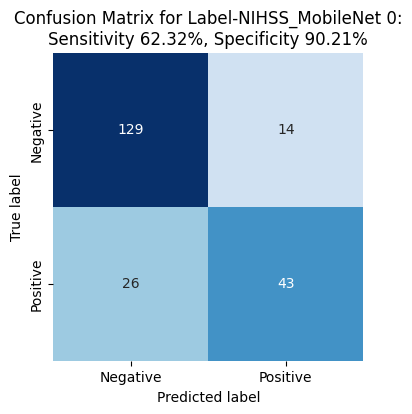

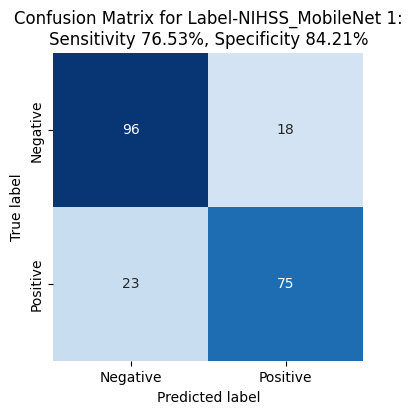

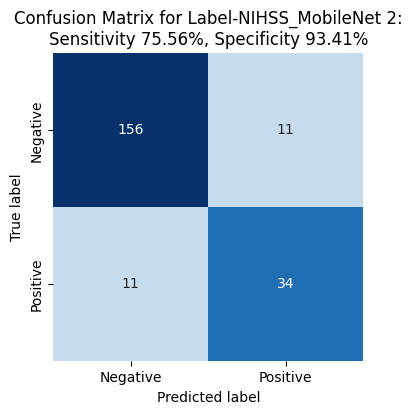

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for Resnet-combined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-NIHSS_MobileNet {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


7/7 [==============================] - 0s 48ms/step


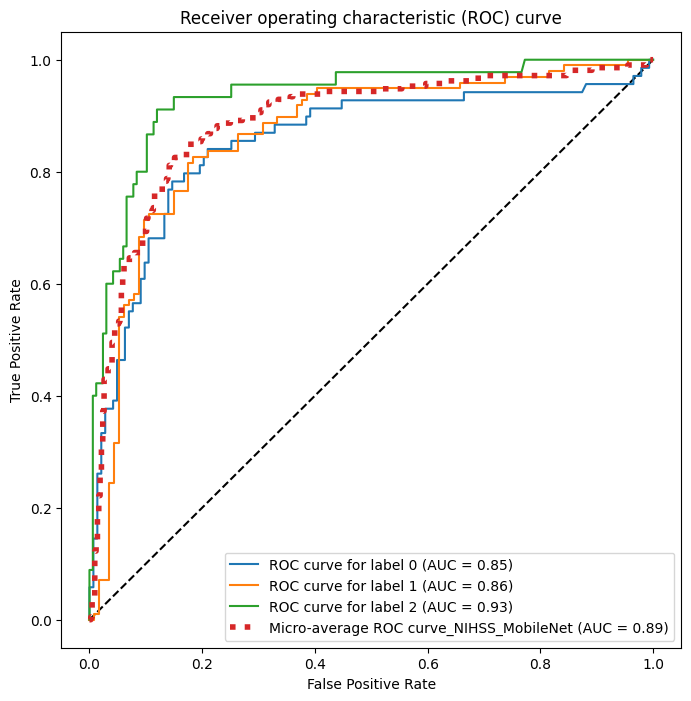

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_MobileNet1.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve_NIHSS_MobileNet (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


**ResNet50**




In [ ]:
# Create the ResNet model
base_model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)

# Freeze the base model
base_model.trainable = False

# Add the classification head
inputs = keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model_resnet = keras.Model(inputs, outputs)

# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_resnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:

# Train the model
history = model_resnet.fit(
    x=X_train,y=y_train,
    epochs=150,
    validation_data=(X_test, y_test),
)

Epoch 1/150
16/16 [==============================] - 7s 318ms/step - loss: 0.6155 - accuracy: 0.7541 - val_loss: 0.9431 - val_accuracy: 0.5613
Epoch 2/150
16/16 [==============================] - 3s 203ms/step - loss: 0.6063 - accuracy: 0.7256 - val_loss: 0.9317 - val_accuracy: 0.5660
Epoch 3/150
16/16 [==============================] - 3s 204ms/step - loss: 0.5674 - accuracy: 0.7724 - val_loss: 0.8607 - val_accuracy: 0.6557
Epoch 4/150
16/16 [==============================] - 3s 171ms/step - loss: 0.5243 - accuracy: 0.8374 - val_loss: 0.8475 - val_accuracy: 0.6274
Epoch 5/150
16/16 [==============================] - 3s 203ms/step - loss: 0.5073 - accuracy: 0.8089 - val_loss: 0.8415 - val_accuracy: 0.6604
Epoch 6/150
16/16 [==============================] - 3s 169ms/step - loss: 0.4831 - accuracy: 0.8476 - val_loss: 0.8421 - val_accuracy: 0.5943
Epoch 7/150
16/16 [==============================] - 3s 201ms/step - loss: 0.4719 - accuracy: 0.8679 - val_loss: 0.8047 - val_accuracy: 0.6557

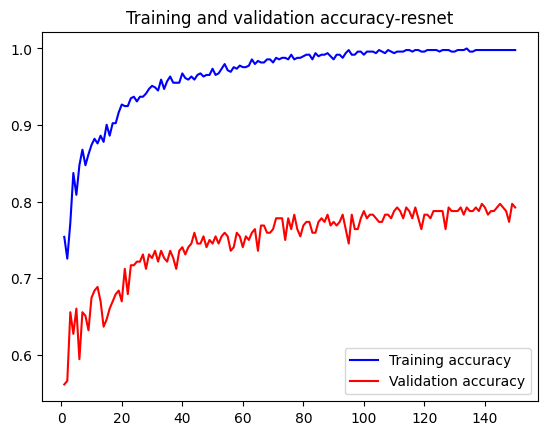

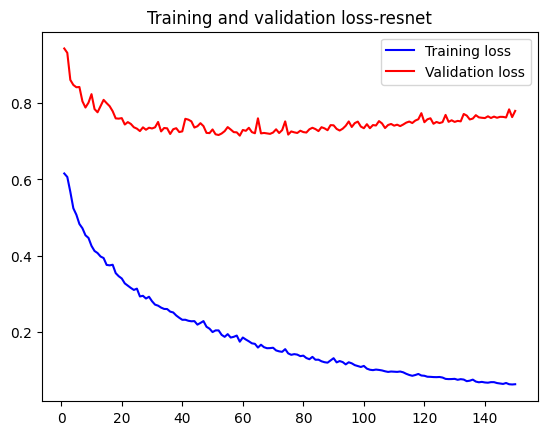

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy-resnet")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss-resnet")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_resnet.predict(X_test)

7/7 [==============================] - 1s 117ms/step


Evaluation criteria for Resnet-combined
Label 0: Sensitivity 69.57%, Specificity 88.11%
Label 1: Sensitivity 79.59%, Specificity 84.21%
Label 2: Sensitivity 68.89%, Specificity 93.41%
Confusion Matrix for Label 0:
 [[126  17]
 [ 21  48]]


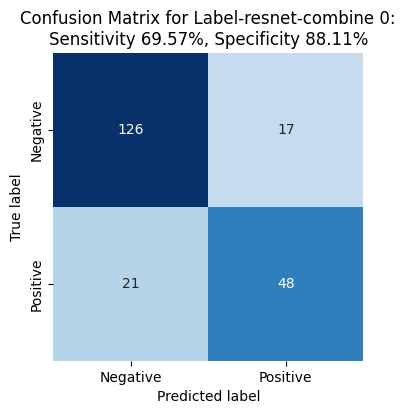

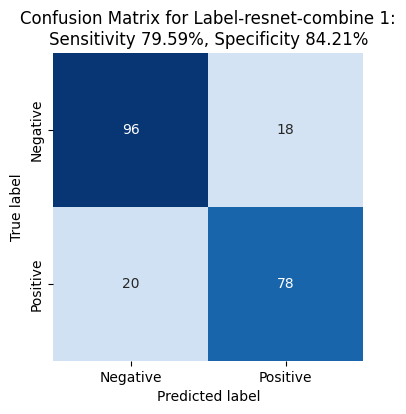

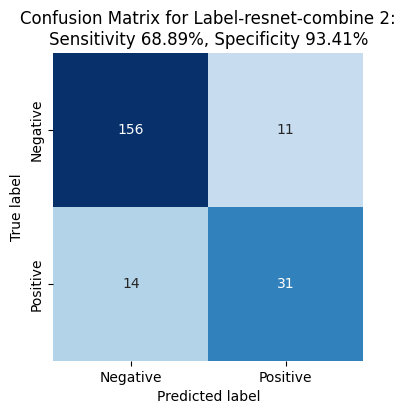

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for Resnet-combined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-resnet-combine {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


7/7 [==============================] - 1s 130ms/step


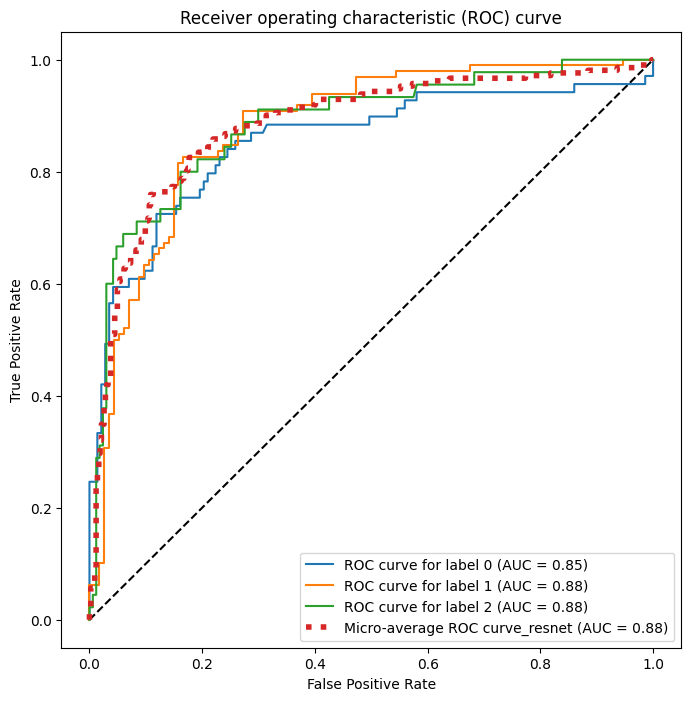

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_resnet.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve_resnet (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


**ACL-ResNet-50**

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Create the ResNet model
base_model = keras.applications.ResNet50(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
# Freeze the base model
base_model.trainable = False

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create the ResNet model
base_model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)

# Freeze the base model
base_model.trainable = False

inputs = keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)

model_resnet_morelayers = keras.Model(inputs=inputs, outputs=outputs)
model_resnet_morelayers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
    ]

In [ ]:

# Train the model
history = model_resnet_morelayers.fit(
    x=X_train,y=y_train,
    epochs=150,
    validation_data=(X_test, y_test),
)

Epoch 1/150
18/18 [==============================] - 18s 809ms/step - loss: 1.0553 - accuracy: 0.4192 - val_loss: 1.1298 - val_accuracy: 0.4196
Epoch 2/150
18/18 [==============================] - 6s 366ms/step - loss: 1.0494 - accuracy: 0.4210 - val_loss: 1.0576 - val_accuracy: 0.4554
Epoch 3/150
18/18 [==============================] - 9s 499ms/step - loss: 1.0377 - accuracy: 0.4263 - val_loss: 1.2531 - val_accuracy: 0.4018
Epoch 4/150
18/18 [==============================] - 11s 608ms/step - loss: 1.0164 - accuracy: 0.4405 - val_loss: 1.2849 - val_accuracy: 0.4107
Epoch 5/150
18/18 [==============================] - 13s 742ms/step - loss: 1.0320 - accuracy: 0.4458 - val_loss: 1.0954 - val_accuracy: 0.4107
Epoch 6/150
18/18 [==============================] - 7s 388ms/step - loss: 1.0034 - accuracy: 0.4583 - val_loss: 1.0447 - val_accuracy: 0.4732
Epoch 7/150
18/18 [==============================] - 7s 417ms/step - loss: 0.9952 - accuracy: 0.4920 - val_loss: 1.4227 - val_accuracy: 0.4

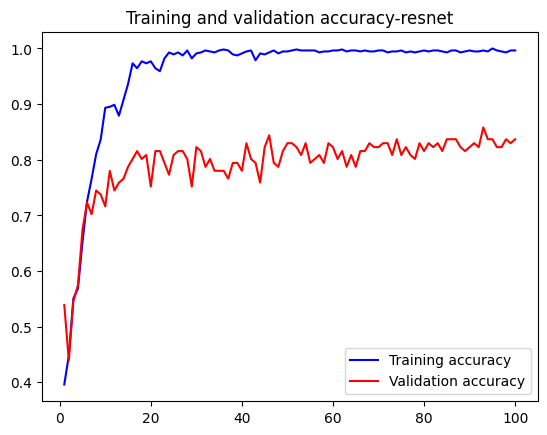

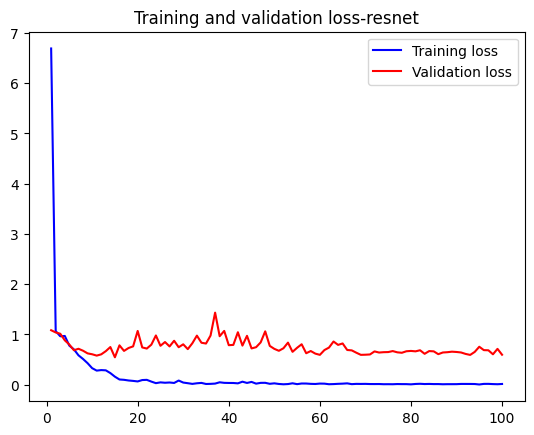

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy-resnet")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss-resnet")
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model_resnet_morelayers.predict(X_test)

5/5 [==============================] - 0s 29ms/step


Evaluation criteria for Resnet-combined
Label 0: Sensitivity 80.00%, Specificity 95.83%
Label 1: Sensitivity 89.71%, Specificity 86.30%
Label 2: Sensitivity 75.00%, Specificity 92.92%
Confusion Matrix for Label 0:
 [[92  4]
 [ 9 36]]


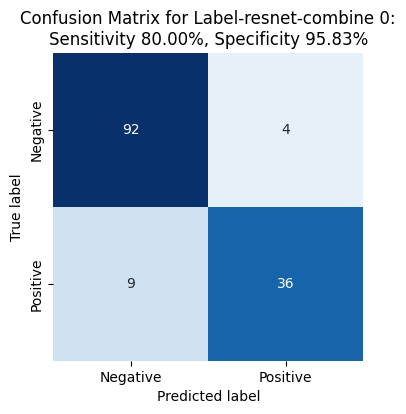

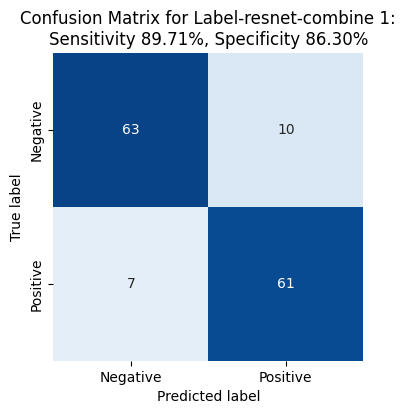

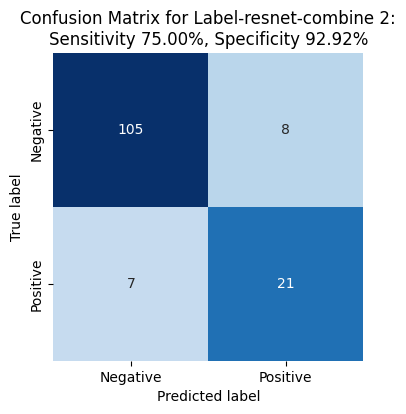

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation criteria for Resnet-combined")

# Calculate the confusion matrix for each label
cm = multilabel_confusion_matrix(y_test, y_pred.round())

# Extract TP, TN, FP, and FN from the confusion matrices
TP = cm[:, 1, 1]
TN = cm[:, 0, 0]
FP = cm[:, 0, 1]
FN = cm[:, 1, 0]

# Calculate sensitivity and specificity for each label
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

# Print the results
for i in range(len(sensitivity)):
    print("Label {}: Sensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))

# Print the confusion matrix for the first label
print("Confusion Matrix for Label 0:\n", cm[0])
# Plot the confusion matrices as heatmaps
for i in range(len(sensitivity)):
    labels = ['Negative', 'Positive']
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, cbar=False, vmin=0, vmax=y_test[:, i].sum())
    plt.title("Confusion Matrix for Label-resnet-combine {}:\nSensitivity {:.2f}%, Specificity {:.2f}%".format(i, sensitivity[i], specificity[i]))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


5/5 [==============================] - 0s 25ms/step


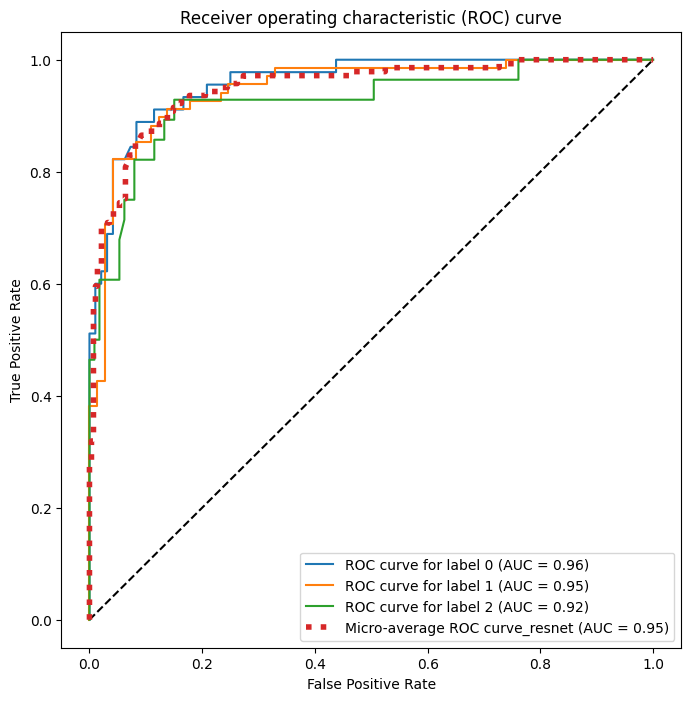

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your CNN model on the training data using VGG16

# Make predictions on the testing data
y_pred_prob = model_resnet_morelayers.predict(X_test)

# Compute the ROC curve and AUC score for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label and micro-average
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for label {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve_resnet (AUC = {:.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
